# Capstone Project 
### Ryan Khaleghi and Kevin Cannon

## Introduction

In this project, we will examine collaborative filtering and matrix factorization recommender systems using TripAdvisor data. The goal is to determine which is faster.

## Data

The dataset contains reviews of 12774 hotels, with over 1.5 million reviews.

There are 8 ratings in the dataset: overall, value, rooms, location, cleanliness, check in/front desk, service, and business service. These are rated from 0-5 stars, with missing ratings indicated by -1.

In [1]:
import pandas as pd
import numpy as np
import glob
#import tripadvisor_convert
import dill

#save session
#dill.dump_session('notebook_env.db')

#load session
#dill.load_session('notebook_env.db')

#json_file = '/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json_copy/73739.json'
#json_file = '/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/3256888.json'
#df = tripadvisor_convert.to_df(json_file)
#print(df.head(2))


In [2]:
import json
from bs4 import BeautifulSoup
import pandas as pd
from os import path

#function to turn the json files into a dataframe
def json_to_df(filename):
    """Return a Pandas DataFrame with Reviews from the JSON File given."""

    with open(filename) as f:
        data = json.load(f)
        reviews = data['Reviews']
        info = data['HotelInfo']

    df = pd.DataFrame()
    for review in reviews:
        rr = pd.Series(review['Ratings'], name=review['ReviewID'])
        rr['Date'] = review['Date']
        rr['Author'] = review['Author']
        try:
            rr['AuthorLocation'] = review['AuthorLocation'].split(', ')[-1]
        except Exception:
            rr['AuthorLocation'] = np.nan
        rr['Review'] = review['Content']
        df = df.append(rr)


    # Hotel Info
    df['HotelID'] = int(info['HotelID'])
    try:
        df['Hotel'] = info['Name']
    except Exception:
        df['Hotel'] = ""
    price_range = [int(''.join([el for el in price if el.isdigit()])) for price in info['Price'].split('-')]
    df['PriceMin'] = price_range[0]
    df['PriceMax'] = price_range[-1]
    try:
        address = BeautifulSoup(info['Address'], 'lxml')
    except Exception:
        address = ""
    try:
        region = address.find('span', property='v:region').text
    except Exception:
        region = np.nan
    try:
        df['HotelLocation'] = region
    except Exception:
        df['HotelLocation'] = ""
         
    return df

In [206]:
from timeit import default_timer as timer #for timing

start = timer()
#load data into dataframe
path ='/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json' 
allFiles = glob.glob(path + "/*.json")
#print(allFiles)
#due to computing constraints, we have to sample the data set and can't use the whole thing
#so we randomly sample some number of them
#1000 hotels takes over half an hour
randFiles = np.random.choice(allFiles, 1000, replace=False)
df2 = pd.DataFrame()
df_reviews = pd.DataFrame()
list_ = []
i = 1

#switch between either sampling or all of the files
for file_ in randFiles:
#for file_ in allFiles:
    try:
        #df = tripadvisor_convert.to_df(file_)
        df2 = json_to_df(file_)
    #df2 = json_to_df(file_)
    except Exception:
        pass 
    list_.append(df2)
    df_reviews = pd.concat(list_)
    print(file_ + "... done  -", i)
    i = i+1
end = timer()

df_reviews.drop_duplicates(keep='first', inplace=True)
print(df_reviews.head(2))
print (end - start)
print(len(df_reviews))


/Users/Ryan/anaconda/lib/python3.5/site-packages/bs4/builder/_lxml.py:240: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  self.parser.feed(markup)
/Users/Ryan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/296904.json... done  - 1
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/84296.json... done  - 2
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/294921.json... done  - 3
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/187737.json... done  - 4
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2516236.json... done  - 5
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/533835.json... done  - 6
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1028947.json... done  - 7
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/606537.json... done  - 8
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/121267.json... done  - 9
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2515294.json... done  - 10
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2515855.json... done  - 11
/Users/Ryan/Desktop/Programming/SMU/Ca

/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1079093.json... done  - 94
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/151827.json... done  - 95
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/674662.json... done  - 96
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2514631.json... done  - 97
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/291637.json... done  - 98
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/240164.json... done  - 99
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/557561.json... done  - 100
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/232965.json... done  - 101
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/650696.json... done  - 102
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/283377.json... done  - 103
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/77730.json... done  - 104
/Users/Ryan/Desktop/Progra

/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/620040.json... done  - 185
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/206927.json... done  - 186
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/223413.json... done  - 187
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2514662.json... done  - 188
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/256639.json... done  - 189
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/295766.json... done  - 190
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/121991.json... done  - 191
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/109789.json... done  - 192
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/228809.json... done  - 193
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/195005.json... done  - 194
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/155803.json... done  - 195
/Users/Ryan/Desktop/

/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/665258.json... done  - 276
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2515876.json... done  - 277
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/529995.json... done  - 278
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2515667.json... done  - 279
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/114031.json... done  - 280
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2514429.json... done  - 281
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/169795.json... done  - 282
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/84743.json... done  - 283
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/562399.json... done  - 284
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/277146.json... done  - 285
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/226759.json... done  - 286
/Users/Ryan/Desktop

/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/650174.json... done  - 367
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/87317.json... done  - 368
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2226820.json... done  - 369
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/239591.json... done  - 370
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1104000.json... done  - 371
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/74936.json... done  - 372
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/238571.json... done  - 373
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/252140.json... done  - 374
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/295517.json... done  - 375
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/76686.json... done  - 376
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/234944.json... done  - 377
/Users/Ryan/Desktop/Pr

/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/226187.json... done  - 458
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/654620.json... done  - 459
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1154340.json... done  - 460
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/82656.json... done  - 461
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/456987.json... done  - 462
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/203974.json... done  - 463
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1102016.json... done  - 464
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/939153.json... done  - 465
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/256571.json... done  - 466
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/89492.json... done  - 467
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1722910.json... done  - 468
/Users/Ryan/Desktop/

/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2514280.json... done  - 549
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2514932.json... done  - 550
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/568659.json... done  - 551
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/598066.json... done  - 552
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/285089.json... done  - 553
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/504891.json... done  - 554
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1217172.json... done  - 555
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/120770.json... done  - 556
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/233866.json... done  - 557
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/593241.json... done  - 558
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/619181.json... done  - 559
/Users/Ryan/Deskto

/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/681327.json... done  - 640
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1170011.json... done  - 641
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/501063.json... done  - 642
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/298618.json... done  - 643
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2515663.json... done  - 644
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1154940.json... done  - 645
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1582547.json... done  - 646
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1574146.json... done  - 647
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/226489.json... done  - 648
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/238561.json... done  - 649
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/124015.json... done  - 650
/Users/Ryan/Desk

/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/234925.json... done  - 731
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/121996.json... done  - 732
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/229105.json... done  - 733
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/584350.json... done  - 734
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/308224.json... done  - 735
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/73950.json... done  - 736
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2514390.json... done  - 737
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/115623.json... done  - 738
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/585855.json... done  - 739
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/535906.json... done  - 740
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/311255.json... done  - 741
/Users/Ryan/Desktop/P

/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/154001.json... done  - 822
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1194140.json... done  - 823
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/154676.json... done  - 824
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/262555.json... done  - 825
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/89147.json... done  - 826
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/233568.json... done  - 827
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1385888.json... done  - 828
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/574787.json... done  - 829
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/664220.json... done  - 830
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/223084.json... done  - 831
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/602719.json... done  - 832
/Users/Ryan/Desktop/

/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/237442.json... done  - 913
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2516199.json... done  - 914
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/941643.json... done  - 915
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2516105.json... done  - 916
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/181984.json... done  - 917
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/237581.json... done  - 918
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/628633.json... done  - 919
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/294945.json... done  - 920
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/299592.json... done  - 921
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/1204392.json... done  - 922
/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/2515262.json... done  - 923
/Users/Ryan/Deskt

UR67457784   3     3       2             2     
2667.2124191499315
140825


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 13:42:59.502511. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


### EDA
Here we will explore the data.

In [356]:
df_reviews.dtypes

Author                                      object
AuthorLocation                              object
Business service                            object
Business service (e.g., internet access)    object
Check in / front desk                       object
Cleanliness                                 object
Date                                        object
Hotel                                       object
HotelID                                      int64
HotelLocation                               object
Location                                    object
Overall                                     object
PriceMax                                     int64
PriceMin                                     int64
Review                                      object
Rooms                                       object
Service                                     object
Sleep Quality                               object
Value                                       object
dtype: object

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-11-18 20:30:20.915627. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [207]:
#deal with missing numbers
df_reviews.fillna(0, inplace = True)
#df_reviews.isnull()

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:08:15.668773. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [208]:
#convert ratings into numbers instead of objects
df_reviews = df_reviews.astype({'Cleanliness': 'int64', 'Location': 'int64', 'Rooms': 'int64', 'Service': 'int64', \
                   'Sleep Quality': 'int64', 'Value': 'int64', 'Business service': 'int64', \
                  'Check in / front desk': 'int64', 'Overall': 'float'})
df_reviews.dtypes

Author                                      object 
AuthorLocation                              object 
Business service                            int64  
Business service (e.g., internet access)    object 
Check in / front desk                       int64  
Cleanliness                                 int64  
Date                                        object 
Hotel                                       object 
HotelID                                     int64  
HotelLocation                               object 
Location                                    int64  
Overall                                     float64
PriceMax                                    int64  
PriceMin                                    int64  
Review                                      object 
Rooms                                       int64  
Service                                     int64  
Sleep Quality                               int64  
Value                                       int64  
dtype: objec

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:08:18.594064. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [108]:
df_reviews.describe([.01, .05, .25, .5, .75, .95, .99])

,Business service,Check in / front desk,Cleanliness,HotelID,Location,Overall,PriceMax,PriceMin,Rooms,Service,Sleep Quality,Value
count,135754.000000,135754.000000,135754.000000,1.357540e+05,135754.000000,135754.000000,1.357540e+05,1.357540e+05,135754.000000,135754.000000,135754.000000,135754.000000
mean,0.059527,0.763381,3.683287,9.428637e+05,3.142515,3.900931,5.778562e+02,3.763826e+02,3.106362,3.528014,1.848248,3.379554
std,0.783570,1.735977,1.761543,1.002307e+06,2.182920,1.234346,1.189158e+04,1.189203e+04,1.912896,1.781055,2.170607,1.786604
min,-1.000000,-1.000000,-1.000000,7.377300e+04,-1.000000,0.000000,0.000000e+00,0.000000e+00,-1.000000,-1.000000,0.000000,-1.000000
1%,-1.000000,-1.000000,-1.000000,8.065400e+04,-1.000000,1.000000,6.400000e+01,3.900000e+01,-1.000000,-1.000000,0.000000,-1.000000
5%,-1.000000,-1.000000,0.000000,8.783300e+04,-1.000000,1.000000,1.180000e+02,6.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,1.832380e+05,0.000000,3.000000,2.310000e+02,1.250000e+02,2.000000,3.000000,0.000000,2.000000
50%,0.000000,0.000000,4.000000,2.916370e+05,4.000000,4.000000,3.480000e+02,1.720000e+02,4.000000,4.000000,0.000000,4.000000
75%,0.000000,0.000000,5.000000,2.514239e+06,5.000000,5.000000,4.730000e+02,2.310000e+02,5.000000,5.000000,4.000000,5.000000
95%,0.000000,5.000000,5.000000,2.515841e+06,5.000000,5.000000,8.170000e+02,4.280000e+02,5.000000,5.000000,5.000000,5.000000


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-08 22:50:24.503490. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [209]:
#Remove date feature that isn't going to be used in the analysis
#even if it did somehow help the prediction, it shouldn't
#theres two business service ones and one has little data in it, so im dropping it
df_reviews = df_reviews.drop(['Date'], axis = 1)
df_reviews = df_reviews.drop(['Business service (e.g., internet access)'], axis = 1)
print(df_reviews.head(2))

               Author AuthorLocation  Business service  Check in / front desk  \
UR128387716  COS_10    Bucuresti      0                 0                       
UR67457784   Mazzer72  Bournemouth    0                 0                       

             Cleanliness       Hotel  HotelID HotelLocation  Location  \
UR128387716  5            Fuar Hotel  296904   0             5          
UR67457784   4            Fuar Hotel  296904   0             4          

             Overall  PriceMax  PriceMin  \
UR128387716  4.0      79        66         
UR67457784   3.0      79        66         

                                                                                                                                                                                                                                                                                                                                                                                         Review  \
UR128387716  Hot

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:08:26.448776. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [210]:
#going to rename the features to be shorter and make more sense
df_reviews.rename(index=str, columns={"Business service": "BusServ", 
                                     "Check in / front desk": "CheckIn"}, inplace= True)
print(df_reviews.head(2))

               Author AuthorLocation  BusServ  CheckIn  Cleanliness  \
UR128387716  COS_10    Bucuresti      0        0        5             
UR67457784   Mazzer72  Bournemouth    0        0        4             

                  Hotel  HotelID HotelLocation  Location  Overall  PriceMax  \
UR128387716  Fuar Hotel  296904   0             5         4.0      79         
UR67457784   Fuar Hotel  296904   0             4         3.0      79         

             PriceMin  \
UR128387716  66         
UR67457784   66         

                                                                                                                                                                                                                                                                                                                                                                                         Review  \
UR128387716  Hotel Fuar is located in Istanbul's City Centre, only 2 km away from the

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:08:33.003789. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [211]:
#need to change from int64 to float64 because overall is a float
df_reviews = df_reviews.astype({'Cleanliness': 'float', 'Location': 'float', 'Rooms': 'float', 'Service': 'float', 
                   'Sleep Quality': 'float', 'Value': 'float', 'BusServ': 'float', 'CheckIn': 'float'})
df_reviews.dtypes


Author            object 
AuthorLocation    object 
BusServ           float64
CheckIn           float64
Cleanliness       float64
Hotel             object 
HotelID           int64  
HotelLocation     object 
Location          float64
Overall           float64
PriceMax          int64  
PriceMin          int64  
Review            object 
Rooms             float64
Service           float64
Sleep Quality     float64
Value             float64
dtype: object

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:08:38.899053. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


/Users/Ryan/anaconda/lib/python3.5/site-packages/traitlets/traitlets.py:811: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new (traitlets 4.1) @observe(change) API
  clsname, change_or_name), DeprecationWarning)


<IPython.core.display.Javascript object>


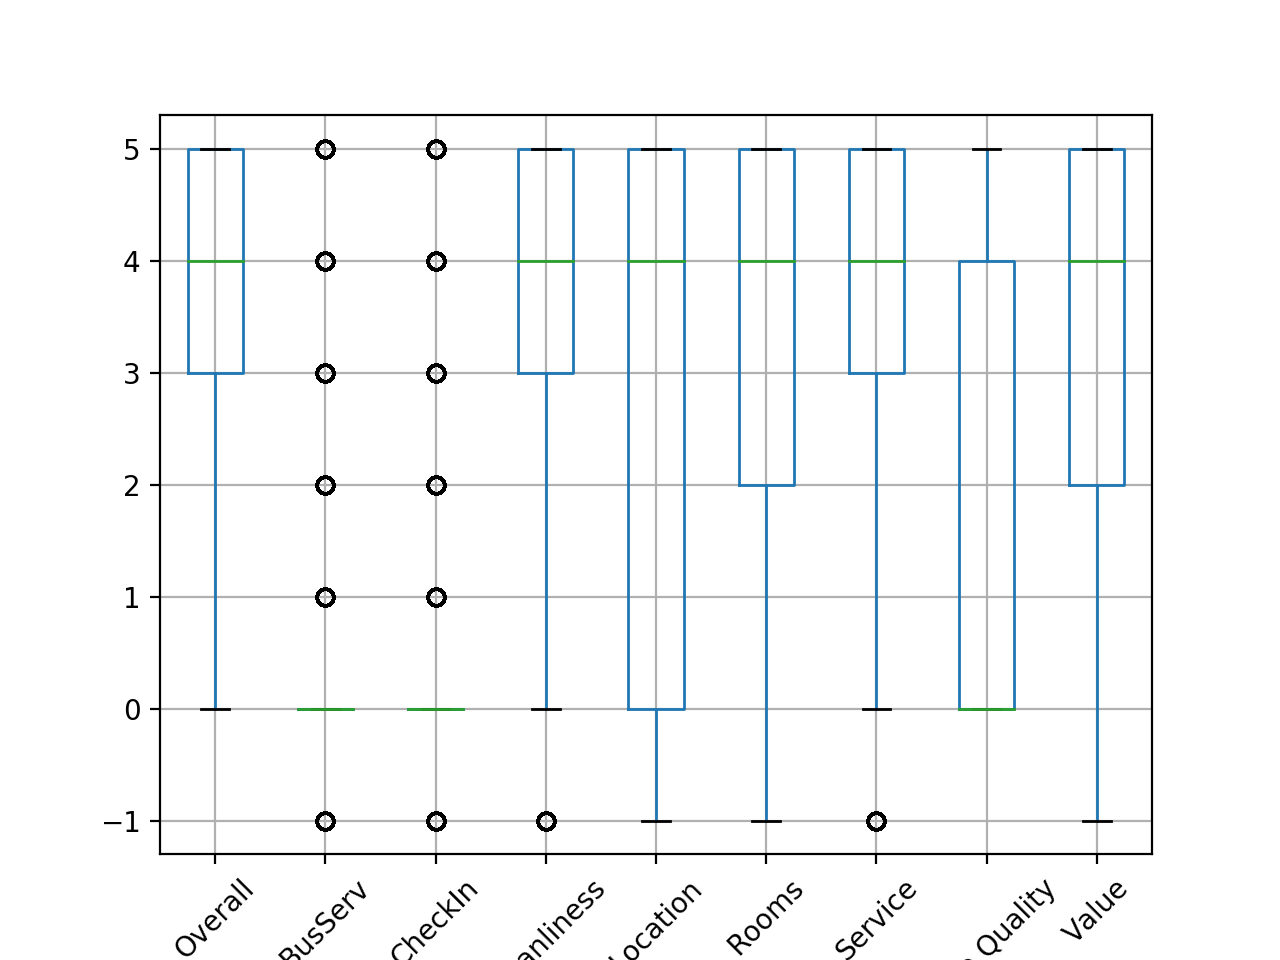

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-08 22:51:04.196708. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [112]:
#now we plot the boxplot for the unaltered features
%matplotlib notebook
import matplotlib.pyplot as plt
df_reviews.boxplot(column=['Overall', 'BusServ', 'CheckIn', 'Cleanliness', 'Location', 'Rooms', 'Service', \
                           'Sleep Quality', 'Value'])
plt.xticks(rotation=45)
plt.show()

Above we see the distribution of the aspect ratings features. Due to how TripAdvisor takes reviews, it looks like Check In and Business Service are missing a significant number of values. Some seem close to Overall, but others, like Sleep Quality and Location, have a wider distribution. We'll next look at a correlation matrix. 

<IPython.core.display.Javascript object>


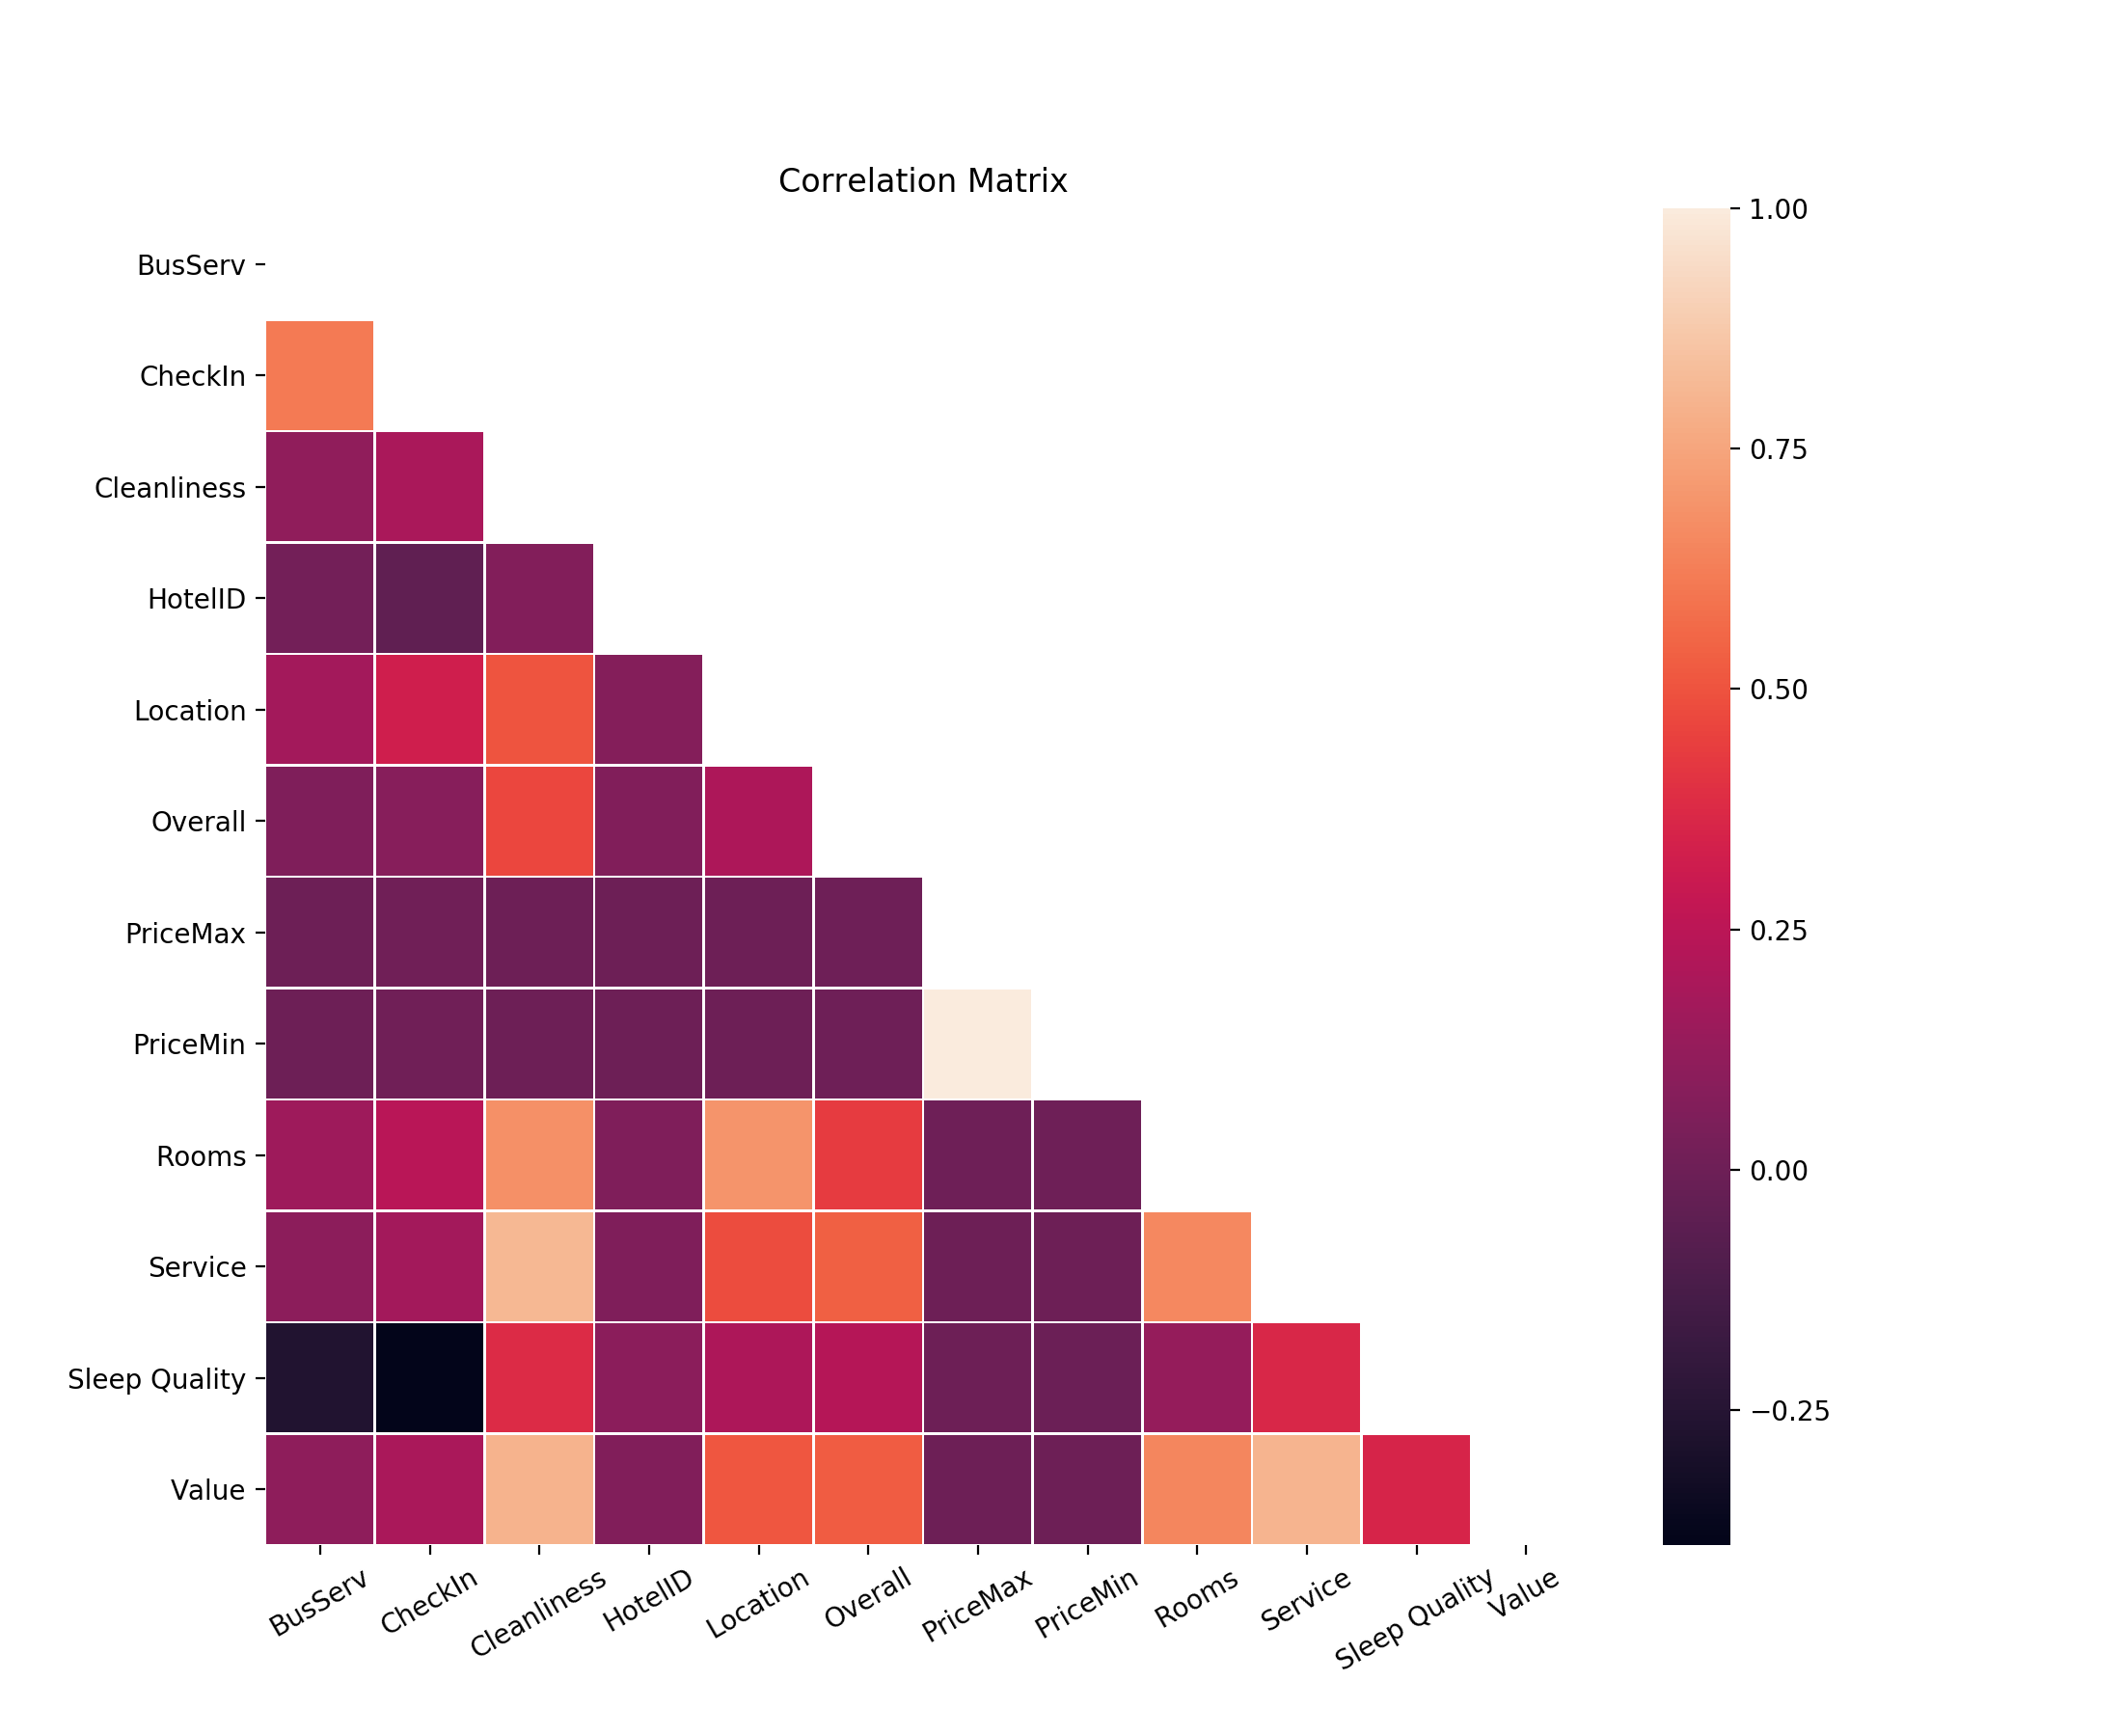

/Users/Ryan/anaconda/lib/python3.5/site-packages/seaborn/palettes.py:727: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


Text(0.5,1,'Correlation Matrix')

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-11-18 20:31:09.478152. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [364]:
#correlation matrix for features
import seaborn as sns 
corr = df_reviews.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

g = sns.heatmap(corr,annot=False, linewidths=.5,mask=mask)
plt.xticks(rotation=30)
plt.title("Correlation Matrix")

As we see from the scatterplot above, many of the individual ratings do not show strong correlation to the 'Overall' rating. Of the 8 individual rating categories, only Cleanliness, Rooms, Service, and Value show a strong correlation to the 'Overall' rating. This is probably because most of them are missing. 

The question is, what to do with missing ratings? One of the models, collaborative filtering, will not use them at all. The other, matrix factorization will use them, so it seems useful to have them in. We decided to replace them with the Overall value, as from the correlation data, half the aspect ratings correlate strongly with Overall, 2 are missing, and 2 don't. We'd like to think they should be correlated, though.

In [212]:
#now we can assign values
df_reviews['BusServ'] = np.where(df_reviews['BusServ'] == 0.0, df_reviews['Overall'], df_reviews['BusServ'])
df_reviews['CheckIn'] = np.where(df_reviews['CheckIn'] == 0.0, df_reviews['Overall'], df_reviews['CheckIn'])
df_reviews['Cleanliness'] = np.where(df_reviews['Cleanliness'] == 0.0, df_reviews['Overall'], df_reviews['Cleanliness'])
df_reviews['Location'] = np.where(df_reviews['Location'] == 0.0, df_reviews['Overall'], df_reviews['Location'])
df_reviews['Rooms'] = np.where(df_reviews['Rooms'] == 0.0, df_reviews['Overall'], df_reviews['Rooms'])
df_reviews['Service'] = np.where(df_reviews['Service'] == 0.0, df_reviews['Overall'], df_reviews['Service'])
df_reviews['Sleep Quality'] = np.where(df_reviews['Sleep Quality'] == 0.0, df_reviews['Overall'], df_reviews['Sleep Quality'])
df_reviews['Value'] = np.where(df_reviews['Value'] == 0.0, df_reviews['Overall'], df_reviews['Value'])
df_reviews.describe([.01, .05, .25, .5, .75, .95, .99])


,BusServ,CheckIn,Cleanliness,HotelID,Location,Overall,PriceMax,PriceMin,Rooms,Service,Sleep Quality,Value
count,140825.00000,140825.000000,140825.000000,1.408250e+05,140825.000000,140825.000000,1.408250e+05,1.408250e+05,140825.000000,140825.000000,140825.000000,140825.000000
mean,3.69825,3.796123,4.091646,1.042559e+06,4.030875,3.979585,4.097433e+02,2.479957e+02,3.849139,3.923536,4.013073,3.820983
std,1.61751,1.525488,1.336624,1.044459e+06,1.461714,1.185502,7.811244e+03,7.810740e+03,1.362342,1.404754,1.197964,1.427251
min,-1.00000,-1.000000,-1.000000,7.378700e+04,-1.000000,0.000000,0.000000e+00,0.000000e+00,-1.000000,-1.000000,0.000000,-1.000000
1%,-1.00000,-1.000000,-1.000000,7.644200e+04,-1.000000,1.000000,0.000000e+00,0.000000e+00,-1.000000,-1.000000,1.000000,-1.000000
5%,-1.00000,1.000000,1.000000,8.756600e+04,1.000000,1.000000,9.700000e+01,3.800000e+01,1.000000,1.000000,1.000000,1.000000
25%,3.00000,3.000000,4.000000,1.998750e+05,4.000000,3.000000,1.960000e+02,9.600000e+01,3.000000,3.000000,3.000000,3.000000
50%,4.00000,4.000000,5.000000,4.972070e+05,5.000000,4.000000,2.940000e+02,1.560000e+02,4.000000,4.000000,4.000000,4.000000
75%,5.00000,5.000000,5.000000,2.514732e+06,5.000000,5.000000,4.280000e+02,2.240000e+02,5.000000,5.000000,5.000000,5.000000
95%,5.00000,5.000000,5.000000,2.515836e+06,5.000000,5.000000,7.160000e+02,4.230000e+02,5.000000,5.000000,5.000000,5.000000


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:08:47.837638. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [213]:
#new input function leaves reviews with -1 so we are replacing them with values
df_reviews['BusServ'] = np.where(df_reviews['BusServ'] == -1, df_reviews['Overall'], df_reviews['BusServ'])
df_reviews['CheckIn'] = np.where(df_reviews['CheckIn'] == -1, df_reviews['Overall'], df_reviews['CheckIn'])
df_reviews['Cleanliness'] = np.where(df_reviews['Cleanliness'] == -1, df_reviews['Overall'], df_reviews['Cleanliness'])
df_reviews['Location'] = np.where(df_reviews['Location'] == -1, df_reviews['Overall'], df_reviews['Location'])
df_reviews['Rooms'] = np.where(df_reviews['Rooms'] == -1, df_reviews['Overall'], df_reviews['Rooms'])
df_reviews['Service'] = np.where(df_reviews['Service'] == -1, df_reviews['Overall'], df_reviews['Service'])
df_reviews['Value'] = np.where(df_reviews['Value'] == -1, df_reviews['Overall'], df_reviews['Value'])
df_reviews.describe([.01, .05, .25, .5, .75, .95, .99])

,BusServ,CheckIn,Cleanliness,HotelID,Location,Overall,PriceMax,PriceMin,Rooms,Service,Sleep Quality,Value
count,140825.000000,140825.000000,140825.000000,1.408250e+05,140825.000000,140825.000000,1.408250e+05,1.408250e+05,140825.000000,140825.000000,140825.000000,140825.000000
mean,3.971788,4.001974,4.199425,1.042559e+06,4.237302,3.979585,4.097433e+02,2.479957e+02,3.948283,4.026480,4.013073,3.947488
std,1.185624,1.177832,1.115024,1.044459e+06,1.047601,1.185502,7.811244e+03,7.810740e+03,1.185323,1.219842,1.197964,1.210218
min,0.000000,0.000000,0.000000,7.378700e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1%,1.000000,1.000000,1.000000,7.644200e+04,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000
5%,1.000000,1.000000,2.000000,8.756600e+04,2.000000,1.000000,9.700000e+01,3.800000e+01,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,4.000000,1.998750e+05,4.000000,3.000000,1.960000e+02,9.600000e+01,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,5.000000,4.972070e+05,5.000000,4.000000,2.940000e+02,1.560000e+02,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,2.514732e+06,5.000000,5.000000,4.280000e+02,2.240000e+02,5.000000,5.000000,5.000000,5.000000
95%,5.000000,5.000000,5.000000,2.515836e+06,5.000000,5.000000,7.160000e+02,4.230000e+02,5.000000,5.000000,5.000000,5.000000


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:09:02.293122. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


Now we run the boxplot and correlation matrix again on the adjusted data.

<IPython.core.display.Javascript object>


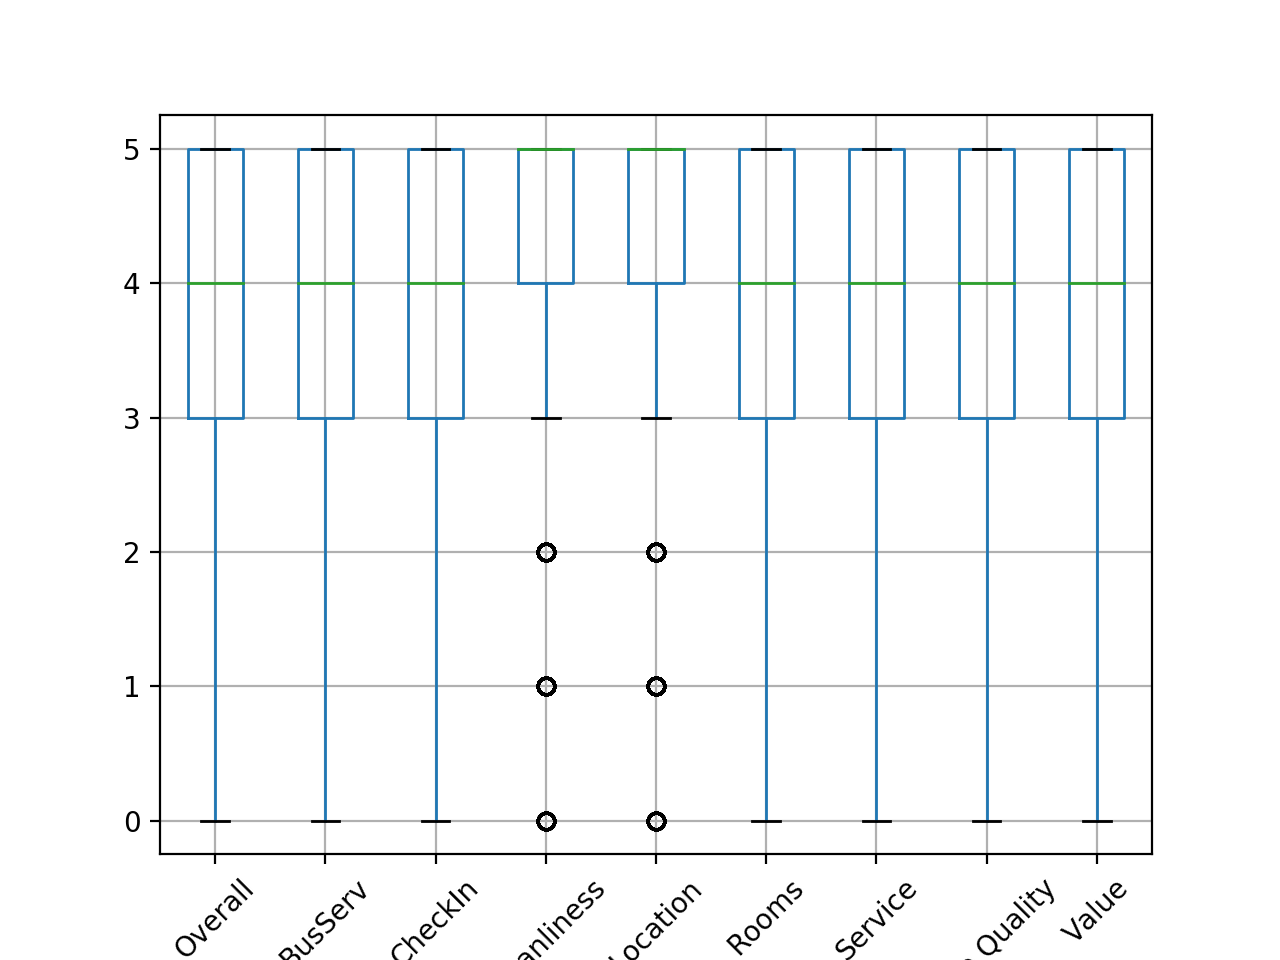

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-11-18 22:04:48.947676. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [367]:
%matplotlib notebook
import matplotlib.pyplot as plt
df_reviews.boxplot(column=['Overall', 'BusServ', 'CheckIn', 'Cleanliness', 'Location', 'Rooms', 'Service', \
                           'Sleep Quality', 'Value'])
plt.xticks(rotation=45)
plt.show()



<IPython.core.display.Javascript object>


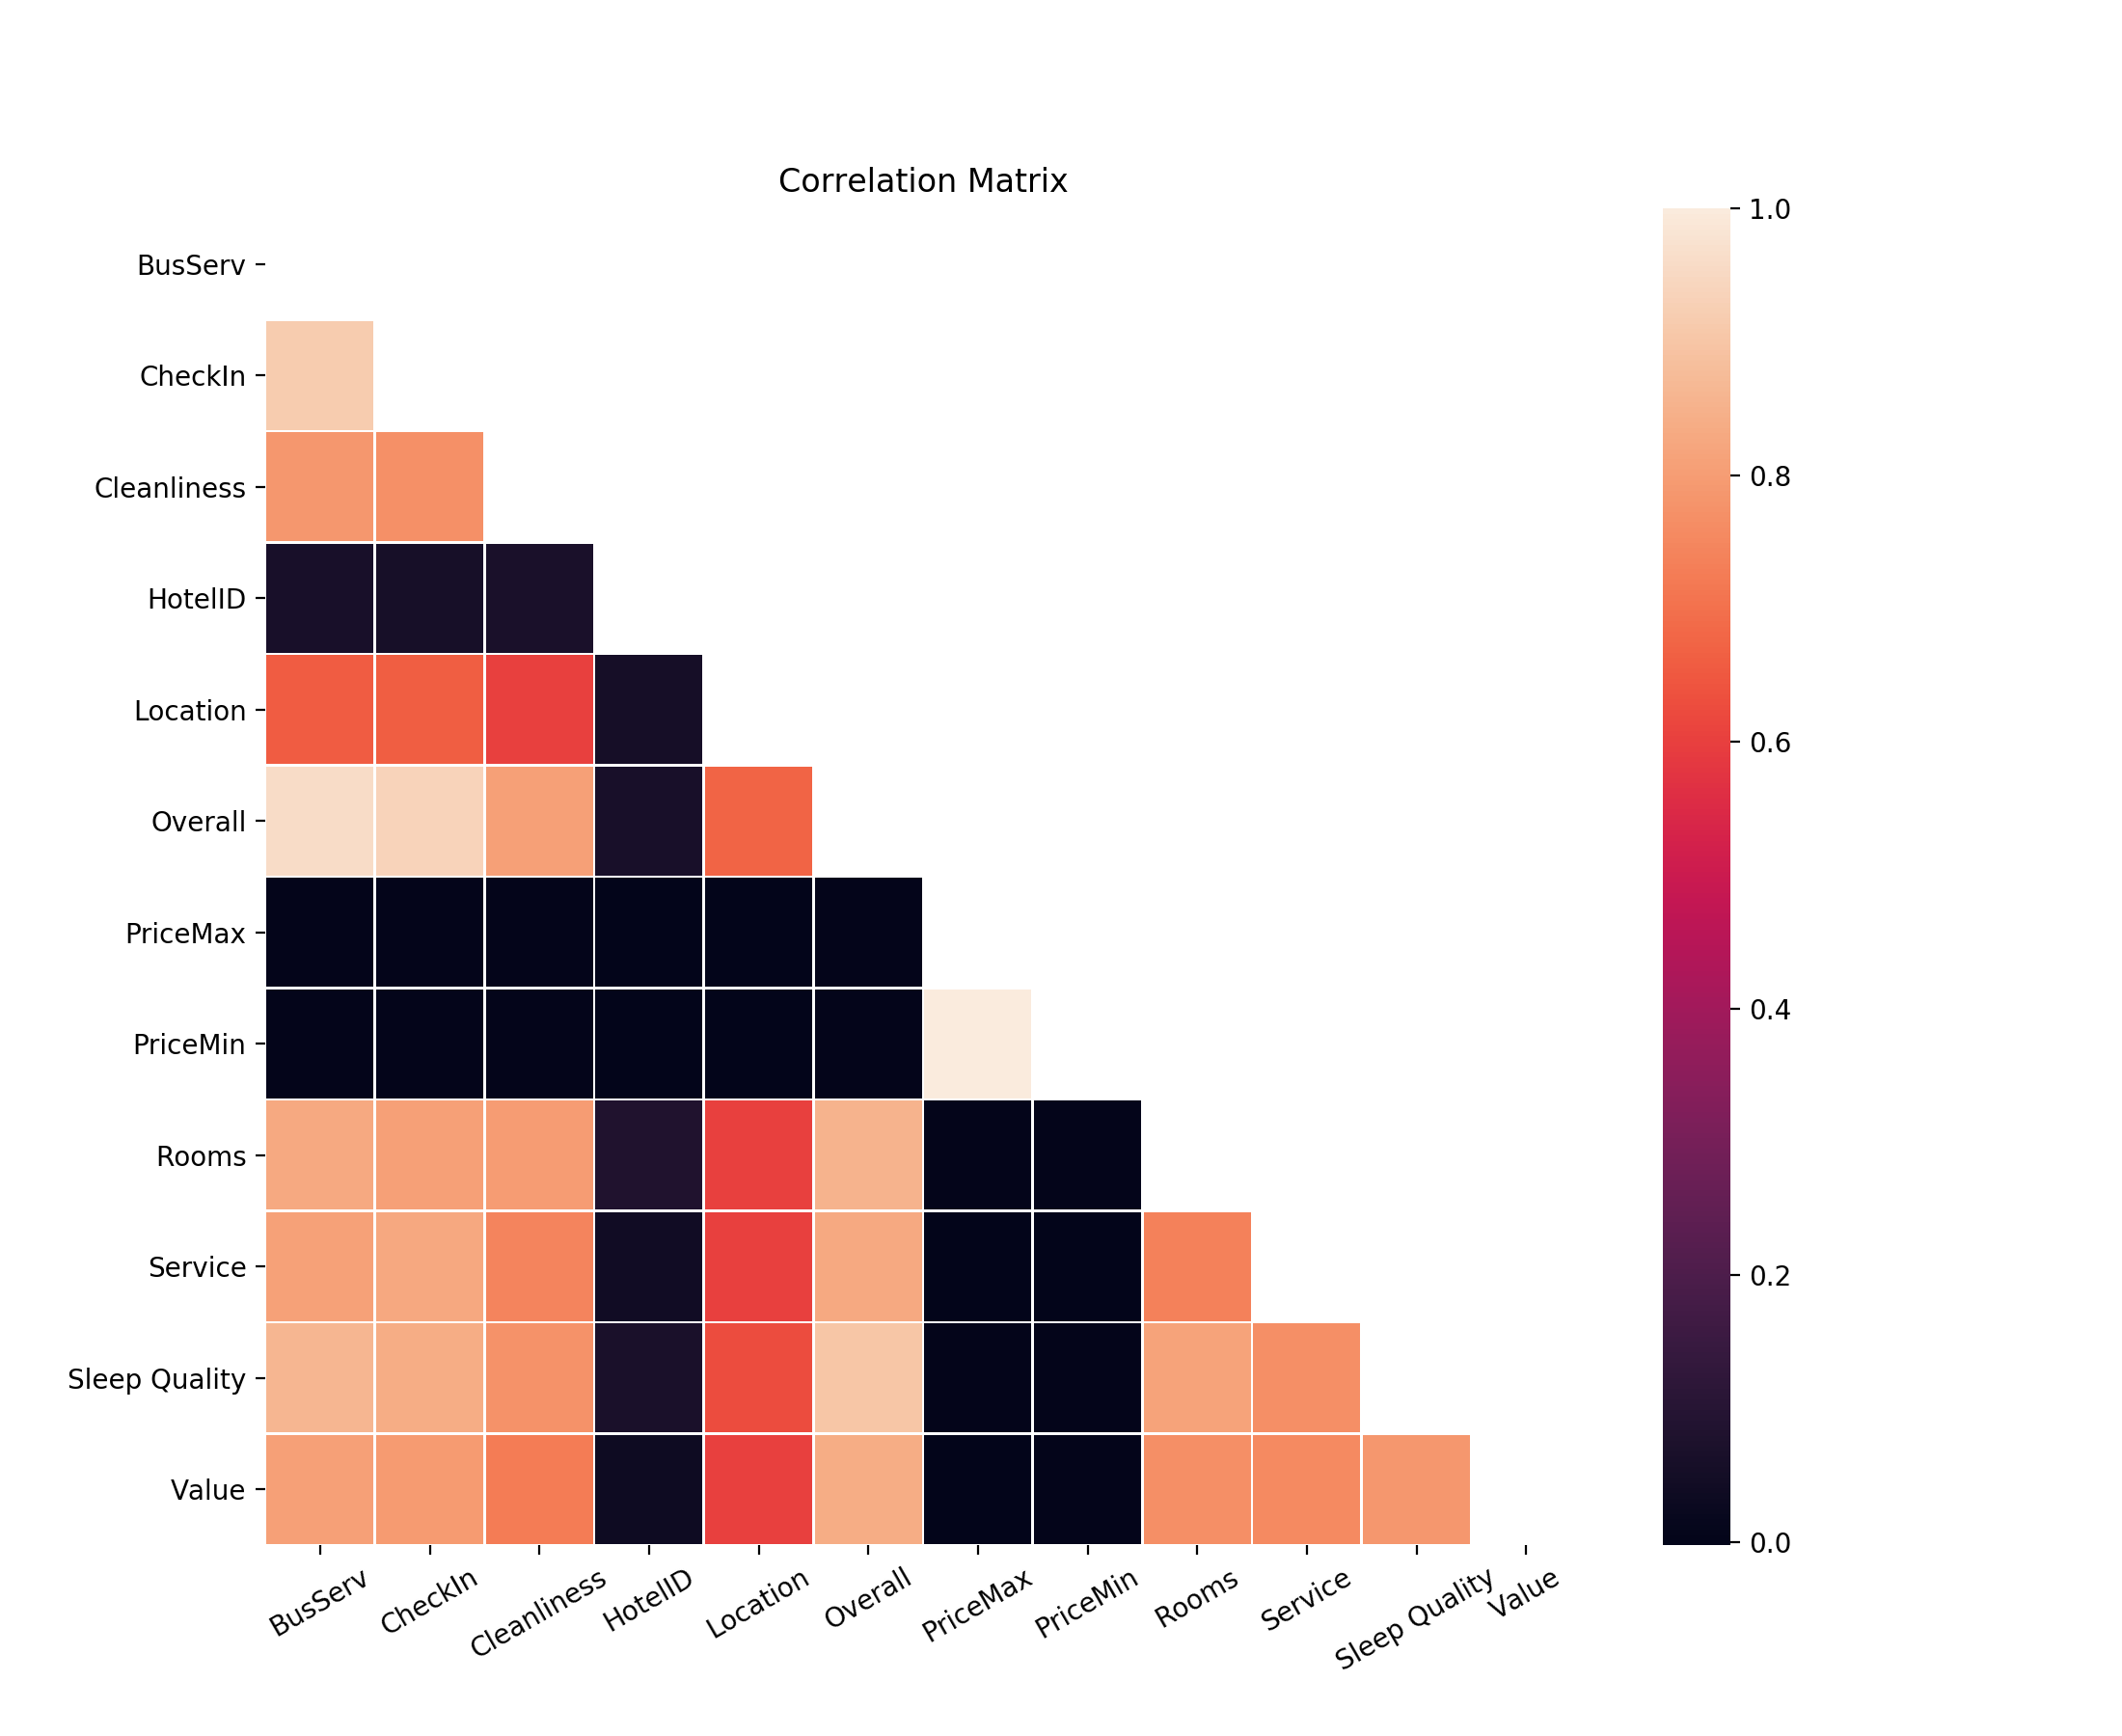

/Users/Ryan/anaconda/lib/python3.5/site-packages/seaborn/palettes.py:727: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


Text(0.5,1,'Correlation Matrix')

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-11-18 22:04:54.049107. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [368]:
import seaborn as sns 
corr = df_reviews.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

g = sns.heatmap(corr,annot=False, linewidths=.5,mask=mask)
plt.xticks(rotation=30)
plt.title("Correlation Matrix")

As we see above, this significantly alters the profile of the data. The aspect ratings in the boxplot look much more like the Overall rating, and they are all correlated. This may impose some weaknesses in some models, but not for what we're testing with this project, which is speed and efficiency.

## Written Reviews

As we have the numerical factors taken care of, the last step before the modeling is to turn the written user reviews into vectors that an algorithm can understand. We do this by classifying the review text into a score from 1 to 5.

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer
import datetime

#uses groups of 1 or 2 words
vectorizer = TfidfVectorizer(ngram_range=(1,2))
t1 = datetime.datetime.now()
vectors = vectorizer.fit_transform(df_reviews['Review'])
print(datetime.datetime.now()-t1)

0:01:50.748032


/Users/Ryan/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-08 23:56:18.575418. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, df_reviews['Overall'], test_size=.3, random_state=42)


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-08 23:58:48.121744. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [154]:
from sklearn.svm import LinearSVC

classifier = LinearSVC()

t1 = datetime.datetime.now()
classifier.fit(X_train, y_train)
print(datetime.datetime.now()-t1)


0:00:30.563791


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-08 23:58:54.412407. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [155]:
preds = classifier.predict(X_test)
print (list(preds[:10]))
print(y_test[:10])

[3.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0]
UR116664730    2.0
UR82330188     5.0
UR81219602     4.0
UR597605582    5.0
UR8525185      3.0
UR114966409    5.0
UR116907496    5.0
UR92274993     5.0
UR5778977      4.0
UR118713073    5.0
Name: Overall, dtype: float64


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-08 23:59:35.646897. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [156]:
from sklearn.metrics import accuracy_score

print ("Accuracy Score: ", accuracy_score(y_test, preds))

Accuracy Score:  0.6355443935588714


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-08 23:59:40.768961. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [157]:
pd.crosstab(y_test, preds, colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,2.0,3.0,4.0,5.0,All
Overall,,,,,,,
0.0,9,0,0,0,58,10,77
1.0,0,2011,364,191,83,83,2732
2.0,0,699,781,765,400,145,2790
3.0,1,213,400,1964,2116,460,5154
4.0,5,51,82,802,7193,4646,12779
5.0,0,19,11,96,3102,13854,17082
All,15,2993,1638,3818,12952,19198,40614


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-08 23:59:45.868901. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


Since the accuracy is high enough, we will perform the transformation to score the reviews and add the column to the dataset.

In [86]:
df_reviews.index.values

array(['UR506838697', 'UR504503872', 'UR968857737', ..., 'UR6813701',
       'UR6737969', 'UR6600165'], dtype=object)

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-08 21:52:53.482094. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [158]:
df_scores = pd.DataFrame(classifier.predict(vectors), index=df_reviews.index.values, columns=['ReviewScores'])
print(df_scores[:10])
df_scores.describe()
df_scores.dtypes
print(len(df_scores))


             ReviewScores
UR123275206           4.0
UR119902749           3.0
UR118961033           3.0
UR118490154           4.0
UR116300429           3.0
UR116023854           3.0
UR115304156           2.0
UR114875738           1.0
UR74973333            2.0
UR42595173            3.0
135379


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-08 23:59:53.461804. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [204]:
#df_reviews.duplicated()
#df_scores.duplicated()

#df_reviews[df_reviews.duplicated(keep=False)]

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 15:54:15.737956. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [159]:
#merge dataframes on index
df_reviews2 = df_reviews.join(df_scores, how='inner')
df_reviews2.drop_duplicates(keep='first', inplace=True)
print(df_reviews2[:10])
df_reviews2.describe()
print(len(df_reviews2))

                     Author  AuthorLocation  BusServ  CheckIn  Cleanliness  \
UR10000030         Tober138  North Carolina      3.0      3.0          3.0   
UR10000091       scubagator              FL      5.0      5.0          5.0   
UR10000121  Bruce-Wisconsin              WI      3.0      4.0          4.0   
UR10000125          FightOn   Santa Clarita      4.0      5.0          4.0   
UR10000145         dharma69      California      1.0      3.0          1.0   
UR10000145         dharma69      California      1.0      3.0          1.0   
UR10000161             CSRE       Margarita      5.0      5.0          5.0   
UR10000416            addar       Singapore      2.0      1.0          2.0   
UR10000470       RMDJakarta       Australia      3.0      5.0          4.0   
UR10000690        Fairlocks         England      5.0      5.0          5.0   

                                      Hotel  HotelID HotelLocation  Location  \
UR10000030     Rio All-Suite Hotel & Casino    91673         

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-08 23:59:59.421984. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [214]:
#result should equal number above
df_reviews2.drop_duplicates(keep='first', inplace=True)
print(len(df_reviews2))

135381


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:09:37.708711. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Collaborative Filtering

Now that we have the data in and examined, we begin the collaborative filtering recommender system.

In [161]:
#SFrame function in turicreate can't have null values, so we have to explore them here first.
df_reviews2.isnull()

,Author,AuthorLocation,BusServ,CheckIn,Cleanliness,Hotel,HotelID,HotelLocation,Location,Overall,PriceMax,PriceMin,Review,Rooms,Service,Sleep Quality,Value,ReviewScores
UR10000030,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
UR10000091,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
UR10000121,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
UR10000125,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
UR10000145,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
UR10000145,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
UR10000161,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
UR10000416,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
UR10000470,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
UR10000690,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 00:00:13.017220. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [215]:
#graphlab is deprecated so we are using turicreate from Apple, from when they acquired graphlab
#make Sframe out of pandas dataframe
import turicreate as tc
from turicreate import SFrame
#getting a byte to string conversion error, converting to CSV to read into SFrame as a fix
#sf_reviews = SFrame(data=df_reviews2)
df_reviews2.to_csv('reviews2.csv')
sf_reviews = SFrame.read_csv('reviews2.csv')
sf_reviews.show()


Unable to parse line "UR10014913,moose19,Delaware,2.0,5.0,3.0,Marriott Waterfront Seattle,2515160,WA,4.0,2.0,337,209,"We were in Washington and Oregon for a week, and this was the most we paid for a room and the least satisfied we were. To be fair, the location of this hotel is..."

1 lines failed to parse correctly

Finished parsing file /Users/Ryan/Desktop/Programming/SMU/Capstone/Notebooks/reviews2.csv

Parsing completed. Parsed 100 lines in 0.887161 secs.

Unable to parse line "UR10014913,moose19,Delaware,2.0,5.0,3.0,Marriott Waterfront Seattle,2515160,WA,4.0,2.0,337,209,"We were in Washington and Oregon for a week, and this was the most we paid for a room and the least satisfied we were. To be fair, the location of this hotel is..."

Read 52591 lines. Lines per second: 27960.9

1 lines failed to parse correctly

Finished parsing file /Users/Ryan/Desktop/Programming/SMU/Capstone/Notebooks/reviews2.csv

Parsing completed. Parsed 135380 lines in 3.98368 secs.

Materializing SFrame

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,float,float,str,int,str,float,float,int,int,str,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:09:46.835309. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [92]:
#set the types back to integers so they process as numbers
#not sure this actually matters
sf_reviews['Overall'] = sf_reviews['Overall'].astype(int)
sf_reviews['BusServ'] = sf_reviews['BusServ'].astype(int)
sf_reviews['CheckIn'] = sf_reviews['CheckIn'].astype(int)
sf_reviews['Cleanliness'] = sf_reviews['Cleanliness'].astype(int)
sf_reviews['Rooms'] = sf_reviews['Rooms'].astype(int)
sf_reviews['Service'] = sf_reviews['Service'].astype(int)
sf_reviews['Sleep Quality'] = sf_reviews['Sleep Quality'].astype(int)
sf_reviews['Value'] = sf_reviews['Value'].astype(int)

#sf_reviews.dtype


[str,
 str,
 str,
 int,
 int,
 int,
 int,
 str,
 int,
 str,
 float,
 int,
 int,
 int,
 str,
 int,
 int,
 int,
 int,
 float]

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-08 21:53:54.490493. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [208]:
#sf_reviews['ReviewScores']

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-27 15:54:54.631135. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [59]:
#train test split
#this is for now, we will likely use specific usernames later to test
training_data, validation_data = tc.recommender.util.random_split_by_user(sf_reviews, user_id='Author', item_id='Hotel')


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-08 20:47:36.311498. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [ ]:
#model = tc.load_model("collab.model")

In [383]:
#collaborative filtering model
t1 = datetime.datetime.now()
model = tc.item_similarity_recommender.create(training_data, user_id='Author', item_id='Hotel', target="Overall")
#model.save("collab.model")
print(datetime.datetime.now()-t1)


Recsys training: model = item_similarity

Warning: Ignoring columns X1, AuthorLocation, Business service, BusServ, CheckIn, Cleanliness, HotelID, HotelLocation, Location, PriceMax, PriceMin, Review, Rooms, Service, Sleep Quality, Value, ReviewScores;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 133145 observations with 114087 users and 797 items.

Data prepared in: 0.38706s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.508ms                        | 0.75       |

| 37.457ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 44.362ms                            | 0                | 0               |

| 116.502ms                           | 100              | 797             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.136837s

0:00:00.598339


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-11-18 22:12:44.514154. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [384]:
t1 = datetime.datetime.now()
recs = model.recommend()
print(datetime.datetime.now()-t1)

recommendations finished on 1000/114087 queries. users per second: 47582.8

recommendations finished on 2000/114087 queries. users per second: 67111.8

recommendations finished on 3000/114087 queries. users per second: 76178.9

recommendations finished on 4000/114087 queries. users per second: 82992.7

recommendations finished on 5000/114087 queries. users per second: 84971.9

recommendations finished on 6000/114087 queries. users per second: 90009

recommendations finished on 7000/114087 queries. users per second: 93411.8

recommendations finished on 8000/114087 queries. users per second: 96721.2

recommendations finished on 9000/114087 queries. users per second: 97871.8

recommendations finished on 10000/114087 queries. users per second: 98492.1

recommendations finished on 11000/114087 queries. users per second: 99542.1

recommendations finished on 12000/114087 queries. users per second: 92844.8

recommendations finished on 13000/114087 queries. users per second: 88551

recommendations finished on 14000/114087 queries. users per second: 85046.4

recommendations finished on 15000/114087 queries. users per second: 83938.6

recommendations finished on 16000/114087 queries. users per second: 83669.3

recommendations finished on 17000/114087 queries. users per second: 82382.3

recommendations finished on 18000/114087 queries. users per second: 80575.1

recommendations finished on 19000/114087 queries. users per second: 80791.2

recommendations finished on 20000/114087 queries. users per second: 77416.8

recommendations finished on 21000/114087 queries. users per second: 79475.9

recommendations finished on 22000/114087 queries. users per second: 80677.4

recommendations finished on 23000/114087 queries. users per second: 81190.6

recommendations finished on 24000/114087 queries. users per second: 81293.4

recommendations finished on 25000/114087 queries. users per second: 81553

recommendations finished on 26000/114087 queries. users per second: 82923.8

recommendations finished on 27000/114087 queries. users per second: 84061.9

recommendations finished on 28000/114087 queries. users per second: 81941.3

recommendations finished on 29000/114087 queries. users per second: 78152.2

recommendations finished on 30000/114087 queries. users per second: 77826.1

recommendations finished on 31000/114087 queries. users per second: 77968.4

recommendations finished on 32000/114087 queries. users per second: 76284.7

recommendations finished on 33000/114087 queries. users per second: 76519.6

recommendations finished on 34000/114087 queries. users per second: 75040.4

recommendations finished on 35000/114087 queries. users per second: 73942.8

recommendations finished on 36000/114087 queries. users per second: 72750.6

recommendations finished on 37000/114087 queries. users per second: 73798.2

recommendations finished on 38000/114087 queries. users per second: 74166.6

recommendations finished on 39000/114087 queries. users per second: 74919.7

recommendations finished on 40000/114087 queries. users per second: 75551.1

recommendations finished on 41000/114087 queries. users per second: 75387

recommendations finished on 42000/114087 queries. users per second: 75657.3

recommendations finished on 43000/114087 queries. users per second: 75538

recommendations finished on 44000/114087 queries. users per second: 73199.1

recommendations finished on 45000/114087 queries. users per second: 73113.3

recommendations finished on 46000/114087 queries. users per second: 73774.5

recommendations finished on 47000/114087 queries. users per second: 73431.2

recommendations finished on 48000/114087 queries. users per second: 74015.8

recommendations finished on 49000/114087 queries. users per second: 74567

recommendations finished on 50000/114087 queries. users per second: 75191.6

recommendations finished on 51000/114087 queries. users per second: 74927.8

recommendations finished on 52000/114087 queries. users per second: 75205.4

recommendations finished on 53000/114087 queries. users per second: 75016.7

recommendations finished on 54000/114087 queries. users per second: 74991.4

recommendations finished on 55000/114087 queries. users per second: 75308.9

recommendations finished on 56000/114087 queries. users per second: 75677.6

recommendations finished on 57000/114087 queries. users per second: 74696.4

recommendations finished on 58000/114087 queries. users per second: 73829.2

recommendations finished on 59000/114087 queries. users per second: 74297.1

recommendations finished on 60000/114087 queries. users per second: 74836.7

recommendations finished on 61000/114087 queries. users per second: 74339.7

recommendations finished on 62000/114087 queries. users per second: 74116.3

recommendations finished on 63000/114087 queries. users per second: 74251.9

recommendations finished on 64000/114087 queries. users per second: 73904.1

recommendations finished on 65000/114087 queries. users per second: 73284.4

recommendations finished on 66000/114087 queries. users per second: 73071.8

recommendations finished on 67000/114087 queries. users per second: 73538.9

recommendations finished on 68000/114087 queries. users per second: 74049.7

recommendations finished on 69000/114087 queries. users per second: 74638.7

recommendations finished on 70000/114087 queries. users per second: 74621.5

recommendations finished on 71000/114087 queries. users per second: 73849.3

recommendations finished on 72000/114087 queries. users per second: 73578.6

recommendations finished on 73000/114087 queries. users per second: 74051.5

recommendations finished on 74000/114087 queries. users per second: 74499.1

recommendations finished on 75000/114087 queries. users per second: 74783.4

recommendations finished on 76000/114087 queries. users per second: 75035

recommendations finished on 77000/114087 queries. users per second: 74546.7

recommendations finished on 78000/114087 queries. users per second: 74424.9

recommendations finished on 79000/114087 queries. users per second: 74179.7

recommendations finished on 80000/114087 queries. users per second: 74322.5

recommendations finished on 81000/114087 queries. users per second: 74110.3

recommendations finished on 82000/114087 queries. users per second: 73266

recommendations finished on 83000/114087 queries. users per second: 73092.5

recommendations finished on 84000/114087 queries. users per second: 73120.5

recommendations finished on 85000/114087 queries. users per second: 73157.7

recommendations finished on 86000/114087 queries. users per second: 73414.7

recommendations finished on 87000/114087 queries. users per second: 73449.3

recommendations finished on 88000/114087 queries. users per second: 73106.5

recommendations finished on 89000/114087 queries. users per second: 73279.8

recommendations finished on 90000/114087 queries. users per second: 73018.2

recommendations finished on 91000/114087 queries. users per second: 73287

recommendations finished on 92000/114087 queries. users per second: 73349.2

recommendations finished on 93000/114087 queries. users per second: 73106.7

recommendations finished on 94000/114087 queries. users per second: 73123.8

recommendations finished on 95000/114087 queries. users per second: 73093.3

recommendations finished on 96000/114087 queries. users per second: 72930.9

recommendations finished on 97000/114087 queries. users per second: 73104.8

recommendations finished on 98000/114087 queries. users per second: 73245.9

recommendations finished on 99000/114087 queries. users per second: 73356.9

recommendations finished on 100000/114087 queries. users per second: 72483.6

recommendations finished on 101000/114087 queries. users per second: 71984.9

recommendations finished on 102000/114087 queries. users per second: 72137

recommendations finished on 103000/114087 queries. users per second: 72472.7

recommendations finished on 104000/114087 queries. users per second: 72138.8

recommendations finished on 105000/114087 queries. users per second: 72088.9

recommendations finished on 106000/114087 queries. users per second: 71868.9

recommendations finished on 107000/114087 queries. users per second: 71762.4

recommendations finished on 108000/114087 queries. users per second: 71296.1

recommendations finished on 109000/114087 queries. users per second: 71316

recommendations finished on 110000/114087 queries. users per second: 71320.4

recommendations finished on 111000/114087 queries. users per second: 71106.7

recommendations finished on 112000/114087 queries. users per second: 70330.6

recommendations finished on 113000/114087 queries. users per second: 70064.1

recommendations finished on 114000/114087 queries. users per second: 69416.7

0:00:01.672572


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-11-18 22:12:57.485275. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [ ]:
#model2 = tc.load_model("factor.model")

In [385]:
#factorization model
t1 = datetime.datetime.now()
model2 = tc.ranking_factorization_recommender.create(training_data, user_id='Author', item_id='Hotel', target="Overall")
#model2.save("factor.model")
print(datetime.datetime.now()-t1)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 133145 observations with 114087 users and 797 items.

Data prepared in: 1.65019s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 16643 / 133145 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 2.63158           | Not Viable                               |

| 1       | 0.657895          | Not Viable                               |

| 2       | 0.164474          | Not Viable                               |

| 3       | 0.0411184         | Not Viable                               |

| 4       | 0.0102796         | Not Viable                               |

| 5       | 0.0025699         | Not Viable                               |

| 6       | 0.000642475       | Not Viable                               |

| 7       | 0.000160619       | Not Viable                               |

| 8       | 4.01547e-05       | No Decrease (2.98376 >= 2.74637)         |

| 9       | 1.00387e-05       | 2.73388                                  |

| 10      | 5.01934e-06       | 2.73135                                  |

| 11      | 2.50967e-06       | 2.73583                                  |

| 12      | 1.25483e-06       | 2.74033                                  |

| 13      | 6.27417e-07       | 2.7431                                   |

+---------+-------------------+------------------------------------------+

| Final   | 5.01934e-06       | 2.73135                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 147us        | 2.76589           | 1.18763               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.91s        | 2.68386           | 1.18133               | 5.01934e-06 |

| 2       | 3.73s        | 2.68793           | 1.18042               | 5.01934e-06 |

| 3       | 5.56s        | 2.68595           | 1.17838               | 5.01934e-06 |

| 4       | 7.40s        | 2.68618           | 1.17738               | 5.01934e-06 |

| 5       | 9.28s        | 2.68402           | 1.17576               | 5.01934e-06 |

| 10      | 18.68s       | 2.68105           | 1.1712                | 5.01934e-06 |

| 15      | 27.90s       | 2.68131           | 1.16837               | 5.01934e-06 |

| 20      | 37.08s       | 2.6748            | 1.16346               | 5.01934e-06 |

| 25      | 46.34s       | 2.67127           | 1.15974               | 5.01934e-06 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 2.7399

Final training RMSE: 1.1591

0:01:17.874828


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-11-18 22:15:22.460979. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [386]:
t1 = datetime.datetime.now()
recs2 = model2.recommend()
print(datetime.datetime.now()-t1)

recommendations finished on 1000/114087 queries. users per second: 6295.09

recommendations finished on 2000/114087 queries. users per second: 5009.12

recommendations finished on 3000/114087 queries. users per second: 5247.32

recommendations finished on 4000/114087 queries. users per second: 5279.38

recommendations finished on 5000/114087 queries. users per second: 5416.86

recommendations finished on 6000/114087 queries. users per second: 5429.06

recommendations finished on 7000/114087 queries. users per second: 5311.12

recommendations finished on 8000/114087 queries. users per second: 5259.42

recommendations finished on 9000/114087 queries. users per second: 5363.7

recommendations finished on 10000/114087 queries. users per second: 5461.49

recommendations finished on 11000/114087 queries. users per second: 5522.46

recommendations finished on 12000/114087 queries. users per second: 5591.07

recommendations finished on 13000/114087 queries. users per second: 5649.55

recommendations finished on 14000/114087 queries. users per second: 5701.39

recommendations finished on 15000/114087 queries. users per second: 5743.24

recommendations finished on 16000/114087 queries. users per second: 5771.07

recommendations finished on 17000/114087 queries. users per second: 5807.4

recommendations finished on 18000/114087 queries. users per second: 5841.38

recommendations finished on 19000/114087 queries. users per second: 5875.48

recommendations finished on 20000/114087 queries. users per second: 5902.63

recommendations finished on 21000/114087 queries. users per second: 5929.97

recommendations finished on 22000/114087 queries. users per second: 5955.65

recommendations finished on 23000/114087 queries. users per second: 5976.4

recommendations finished on 24000/114087 queries. users per second: 5997.37

recommendations finished on 25000/114087 queries. users per second: 6015.49

recommendations finished on 26000/114087 queries. users per second: 6027.68

recommendations finished on 27000/114087 queries. users per second: 6032.25

recommendations finished on 28000/114087 queries. users per second: 6046.18

recommendations finished on 29000/114087 queries. users per second: 6060.58

recommendations finished on 30000/114087 queries. users per second: 6073.74

recommendations finished on 31000/114087 queries. users per second: 6081

recommendations finished on 32000/114087 queries. users per second: 6090.97

recommendations finished on 33000/114087 queries. users per second: 6100.03

recommendations finished on 34000/114087 queries. users per second: 6106.64

recommendations finished on 35000/114087 queries. users per second: 6115.93

recommendations finished on 36000/114087 queries. users per second: 6125.89

recommendations finished on 37000/114087 queries. users per second: 6136.64

recommendations finished on 38000/114087 queries. users per second: 6143.76

recommendations finished on 39000/114087 queries. users per second: 6152.62

recommendations finished on 40000/114087 queries. users per second: 6161.06

recommendations finished on 41000/114087 queries. users per second: 6169.51

recommendations finished on 42000/114087 queries. users per second: 6177.46

recommendations finished on 43000/114087 queries. users per second: 6183.28

recommendations finished on 44000/114087 queries. users per second: 6189.33

recommendations finished on 45000/114087 queries. users per second: 6191.03

recommendations finished on 46000/114087 queries. users per second: 6198.59

recommendations finished on 47000/114087 queries. users per second: 6200.29

recommendations finished on 48000/114087 queries. users per second: 6201.8

recommendations finished on 49000/114087 queries. users per second: 6206.47

recommendations finished on 50000/114087 queries. users per second: 6202.07

recommendations finished on 51000/114087 queries. users per second: 6195.14

recommendations finished on 52000/114087 queries. users per second: 6190.33

recommendations finished on 53000/114087 queries. users per second: 6184.44

recommendations finished on 54000/114087 queries. users per second: 6179.24

recommendations finished on 55000/114087 queries. users per second: 6176.52

recommendations finished on 56000/114087 queries. users per second: 6170.2

recommendations finished on 57000/114087 queries. users per second: 6156.6

recommendations finished on 58000/114087 queries. users per second: 6158.12

recommendations finished on 59000/114087 queries. users per second: 6170.33

recommendations finished on 60000/114087 queries. users per second: 6180.69

recommendations finished on 61000/114087 queries. users per second: 6191.56

recommendations finished on 62000/114087 queries. users per second: 6199.98

recommendations finished on 63000/114087 queries. users per second: 6212.5

recommendations finished on 64000/114087 queries. users per second: 6223.57

recommendations finished on 65000/114087 queries. users per second: 6231.53

recommendations finished on 66000/114087 queries. users per second: 6236.58

recommendations finished on 67000/114087 queries. users per second: 6244.97

recommendations finished on 68000/114087 queries. users per second: 6255.23

recommendations finished on 69000/114087 queries. users per second: 6262.04

recommendations finished on 70000/114087 queries. users per second: 6270.38

recommendations finished on 71000/114087 queries. users per second: 6278.78

recommendations finished on 72000/114087 queries. users per second: 6286.7

recommendations finished on 73000/114087 queries. users per second: 6295.86

recommendations finished on 74000/114087 queries. users per second: 6303.7

recommendations finished on 75000/114087 queries. users per second: 6311.55

recommendations finished on 76000/114087 queries. users per second: 6320.05

recommendations finished on 77000/114087 queries. users per second: 6322.24

recommendations finished on 78000/114087 queries. users per second: 6329.54

recommendations finished on 79000/114087 queries. users per second: 6334.78

recommendations finished on 80000/114087 queries. users per second: 6341.48

recommendations finished on 81000/114087 queries. users per second: 6349.29

recommendations finished on 82000/114087 queries. users per second: 6357.05

recommendations finished on 83000/114087 queries. users per second: 6362.58

recommendations finished on 84000/114087 queries. users per second: 6370

recommendations finished on 85000/114087 queries. users per second: 6376.55

recommendations finished on 86000/114087 queries. users per second: 6383.72

recommendations finished on 87000/114087 queries. users per second: 6389.45

recommendations finished on 88000/114087 queries. users per second: 6397.54

recommendations finished on 89000/114087 queries. users per second: 6400.25

recommendations finished on 90000/114087 queries. users per second: 6407.02

recommendations finished on 91000/114087 queries. users per second: 6412.13

recommendations finished on 92000/114087 queries. users per second: 6419.03

recommendations finished on 93000/114087 queries. users per second: 6421.49

recommendations finished on 94000/114087 queries. users per second: 6428.12

recommendations finished on 95000/114087 queries. users per second: 6434.88

recommendations finished on 96000/114087 queries. users per second: 6441.07

recommendations finished on 97000/114087 queries. users per second: 6446.75

recommendations finished on 98000/114087 queries. users per second: 6442.05

recommendations finished on 99000/114087 queries. users per second: 6447.49

recommendations finished on 100000/114087 queries. users per second: 6452.41

recommendations finished on 101000/114087 queries. users per second: 6455.02

recommendations finished on 102000/114087 queries. users per second: 6459.27

recommendations finished on 103000/114087 queries. users per second: 6465.05

recommendations finished on 104000/114087 queries. users per second: 6469.27

recommendations finished on 105000/114087 queries. users per second: 6474.15

recommendations finished on 106000/114087 queries. users per second: 6478.45

recommendations finished on 107000/114087 queries. users per second: 6483.88

recommendations finished on 108000/114087 queries. users per second: 6488.28

recommendations finished on 109000/114087 queries. users per second: 6488.58

recommendations finished on 110000/114087 queries. users per second: 6469.96

recommendations finished on 111000/114087 queries. users per second: 6461.89

recommendations finished on 112000/114087 queries. users per second: 6454.31

recommendations finished on 113000/114087 queries. users per second: 6445.94

recommendations finished on 114000/114087 queries. users per second: 6437.19

0:00:17.775373


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-11-18 22:19:29.146890. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [387]:
tc.recommender.util.compare_models(validation_data, [model, model2], model_names=["Collab","Factorization"])

PROGRESS: Evaluate model Collab

Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |     mean_recall      |    mean_precision    |
+--------+----------------------+----------------------+
|   1    | 0.009302325581395349 | 0.009302325581395349 |
|   2    |  0.0372093023255814  |  0.0186046511627907  |
|   3    | 0.04651162790697674  | 0.015503875968992258 |
|   4    | 0.07441860465116275  | 0.018604651162790687 |
|   5    | 0.07906976744186045  |  0.0158139534883721  |
|   6    | 0.07906976744186045  | 0.013178294573643414 |
|   7    | 0.07906976744186045  | 0.011295681063122924 |
|   8    | 0.07906976744186045  | 0.009883720930232556 |
|   9    | 0.07906976744186045  | 0.008785529715762271 |
|   10   | 0.07906976744186045  | 0.007906976744186047 |
+--------+----------------------+----------------------+
[10 rows x 3 columns]


Overall RMSE: 4.101090242464544

Per User RMSE (best)
+----------+-------+--------------------+

[{'precision_recall_by_user': Columns:
  	Author	str
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 3870
  
  Data:
  +--------+--------+-----------+--------+-------+
  | Author | cutoff | precision | recall | count |
  +--------+--------+-----------+--------+-------+
  | 4morg  |   1    |    0.0    |  0.0   |   1   |
  | 4morg  |   2    |    0.0    |  0.0   |   1   |
  | 4morg  |   3    |    0.0    |  0.0   |   1   |
  | 4morg  |   4    |    0.0    |  0.0   |   1   |
  | 4morg  |   5    |    0.0    |  0.0   |   1   |
  | 4morg  |   6    |    0.0    |  0.0   |   1   |
  | 4morg  |   7    |    0.0    |  0.0   |   1   |
  | 4morg  |   8    |    0.0    |  0.0   |   1   |
  | 4morg  |   9    |    0.0    |  0.0   |   1   |
  | 4morg  |   10   |    0.0    |  0.0   |   1   |
  +--------+--------+-----------+--------+-------+
  [3870 rows x 5 columns]
  Note: Only the head of the SFrame is printed.
  You can use print_rows(num_rows=m, num_columns=n) to print more rows

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-11-18 22:21:31.562477. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [190]:
times = [[2.02, 16.86],[1.71,16.37],[1.42,17.89],[1.47,15.78],[1.44,17.84],[1.57,16.77],[1.43,14.89],[1.53,17.71],[1.56,15.37],[1.67,17.78]]
df_times = pd.DataFrame(times, columns=['Collab times (s)','Matrix times (s)'], dtype=float)

rmse = [[4.04,1.17],[4.11,1.159],[4.0,1.24],[4.1,1.19],[4.17,1.14],[4.04,1.18],[4.18,1.26],[4.22,1.16],[3.92,1.56],[4.1,1.07]]
df_rmse = pd.DataFrame(rmse, columns=['Collab RMSE','Matrix RMSE'], dtype=float)


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 12:27:53.712899. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


<IPython.core.display.Javascript object>


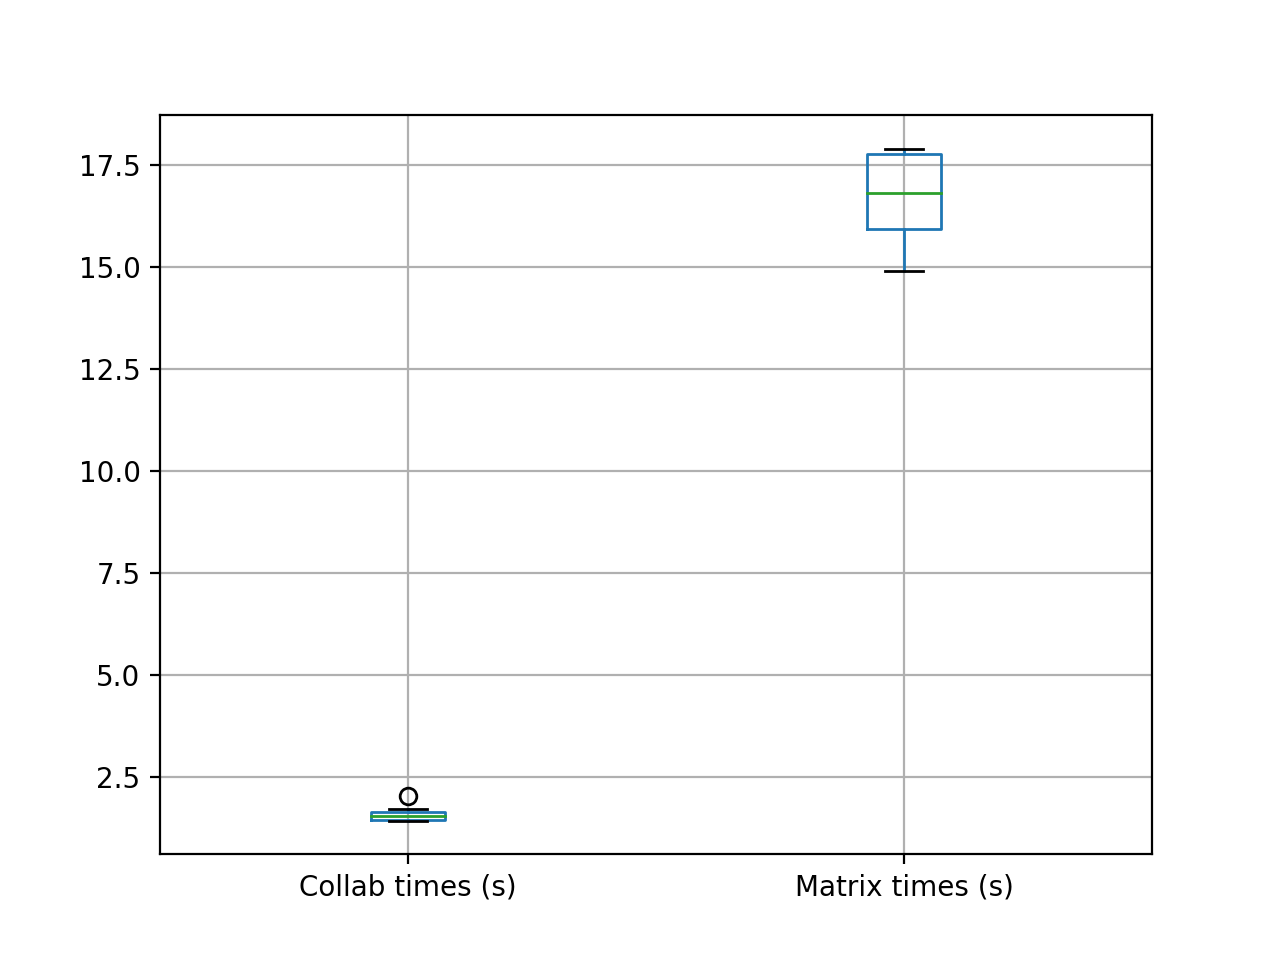

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-11-18 22:21:55.449054. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [389]:
%matplotlib notebook
df_times.boxplot(column=['Collab times (s)','Matrix times (s)'])
plt.show()

<IPython.core.display.Javascript object>


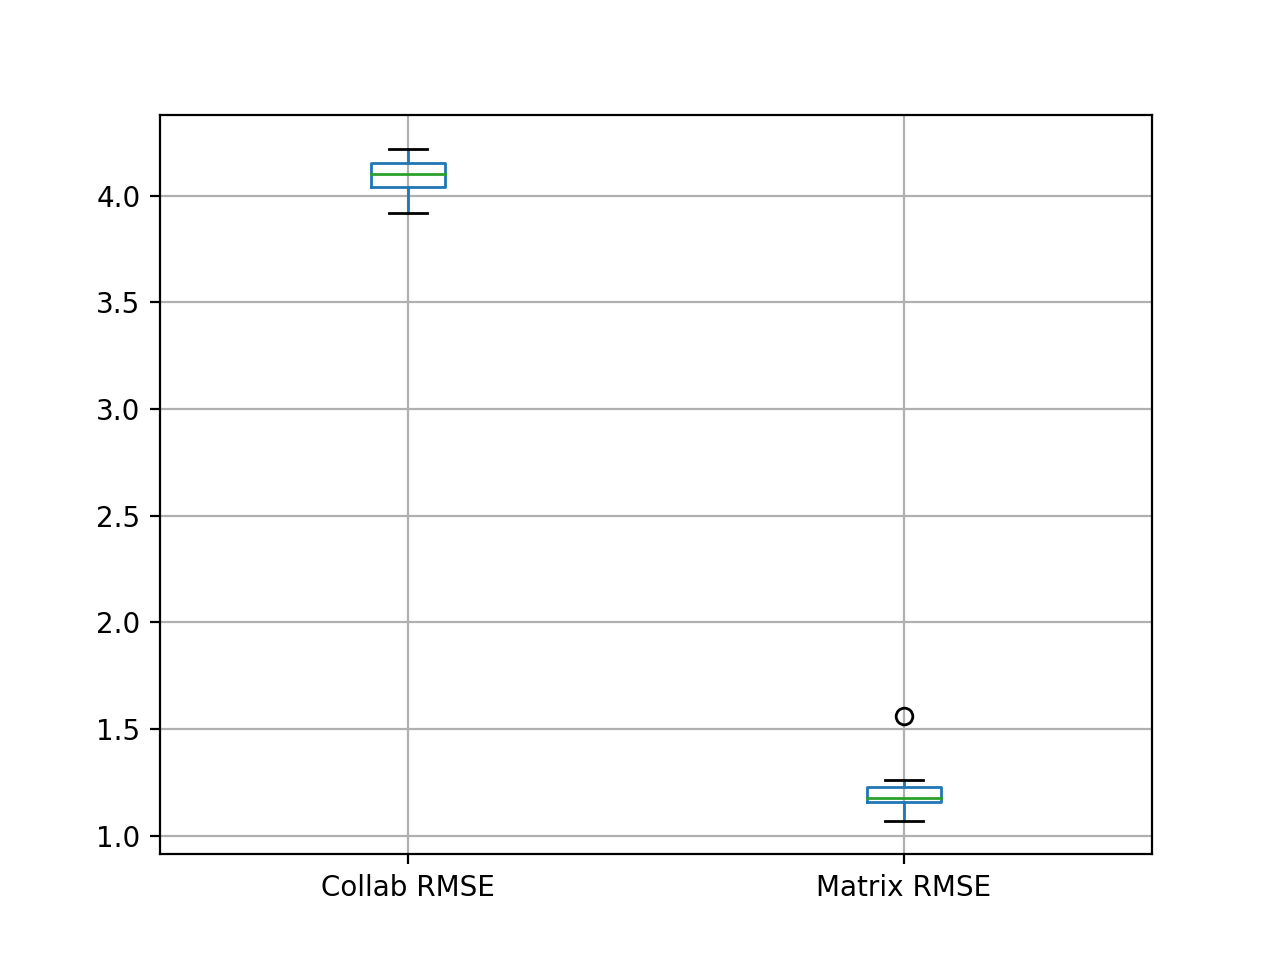

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-11-18 22:22:42.543311. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [390]:
%matplotlib notebook
df_rmse.boxplot(column=['Collab RMSE','Matrix RMSE'])
plt.show()

In [391]:
df_times.describe([.01, .05, .25, .5, .75, .95, .99])

,Collab times (s),Matrix times (s)
count,10.000000,10.000000
mean,1.582000,16.726000
std,0.182988,1.101829
min,1.420000,14.890000
1%,1.420900,14.933200
5%,1.424500,15.106000
25%,1.447500,15.927500
50%,1.545000,16.815000
75%,1.645000,17.762500
95%,1.880500,17.867500


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-11-18 22:23:06.520217. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [392]:
df_rmse.describe([.01, .05, .25, .5, .75, .95, .99])

,Collab RMSE,Matrix RMSE
count,10.000000,10.00000
mean,4.088000,1.21290
std,0.090652,0.13263
min,3.920000,1.07000
1%,3.927200,1.07630
5%,3.956000,1.10150
25%,4.040000,1.15925
50%,4.100000,1.17500
75%,4.155000,1.22750
95%,4.202000,1.42500


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-11-18 22:26:07.185331. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


Now that we have the models built and tested, we want to eliminate the users with only one review and the big user groups like "A TripAdvisor Member", and separate the users into two groups: those with 2 written reviews, and those with more than 2. We will then rerun the models to determine if the accuracy changes for each dataset.

In [216]:
df_3plus = df_reviews2.groupby('Author').filter(lambda x: x['Author'].count() > 2)
df_2rev = df_reviews2.groupby('Author').filter(lambda x: x['Author'].count() == 2)
print(df_2rev.head(10))

                      Author   AuthorLocation  BusServ  CheckIn  Cleanliness  \
UR10000125   FightOn          Santa Clarita    4.0      5.0      4.0           
UR10000145   dharma69         California       1.0      3.0      1.0           
UR10000145   dharma69         California       1.0      3.0      1.0           
UR100014506  BillRhodeIsland  Rhode Island     5.0      5.0      5.0           
UR100015229  AHWS             Arizona          4.0      4.0      5.0           
UR100015229  AHWS             Arizona          4.0      4.0      5.0           
UR10002771   Femmers          The Netherlands  4.0      4.0      5.0           
UR10002771   Femmers          The Netherlands  4.0      4.0      5.0           
UR100027824  rachxx1xx        UK               4.0      4.0      5.0           
UR10002874   meena482         Ontario          1.0      3.0      1.0           

                                             Hotel  HotelID HotelLocation  \
UR10000125   Radisson Plaza Lord Baltimore

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:10:29.067286. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [217]:
df_3plus.to_csv('3plus.csv')
sf_3plus = SFrame.read_csv('3plus.csv')

df_2rev.to_csv('2rev.csv')
sf_2rev = SFrame.read_csv('2rev.csv')

Finished parsing file /Users/Ryan/Desktop/Programming/SMU/Capstone/Notebooks/3plus.csv

Parsing completed. Parsed 100 lines in 0.214847 secs.

Finished parsing file /Users/Ryan/Desktop/Programming/SMU/Capstone/Notebooks/3plus.csv

Parsing completed. Parsed 14461 lines in 0.27276 secs.

Finished parsing file /Users/Ryan/Desktop/Programming/SMU/Capstone/Notebooks/2rev.csv

Parsing completed. Parsed 100 lines in 0.322085 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,float,float,str,int,str,float,float,int,int,str,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file /Users/Ryan/Desktop/Programming/SMU/Capstone/Notebooks/2rev.csv

Parsing completed. Parsed 19590 lines in 0.559443 secs.


Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,float,float,str,int,str,float,float,int,int,str,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:12:22.397405. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [218]:
sf_3plus['Overall'] = sf_3plus['Overall'].astype(int)
sf_3plus['BusServ'] = sf_3plus['BusServ'].astype(int)
sf_3plus['CheckIn'] = sf_3plus['CheckIn'].astype(int)
sf_3plus['Cleanliness'] = sf_3plus['Cleanliness'].astype(int)
sf_3plus['Rooms'] = sf_3plus['Rooms'].astype(int)
sf_3plus['Service'] = sf_3plus['Service'].astype(int)
sf_3plus['Sleep Quality'] = sf_3plus['Sleep Quality'].astype(int)
sf_3plus['Value'] = sf_3plus['Value'].astype(int)
sf_3plus['ReviewScores'] = sf_3plus['ReviewScores'].astype(int)
sf_3plus.show()

Materializing SFrame

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:12:30.705901. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [219]:
sf_2rev['Overall'] = sf_2rev['Overall'].astype(int)
sf_2rev['BusServ'] = sf_2rev['BusServ'].astype(int)
sf_2rev['CheckIn'] = sf_2rev['CheckIn'].astype(int)
sf_2rev['Cleanliness'] = sf_2rev['Cleanliness'].astype(int)
sf_2rev['Rooms'] = sf_2rev['Rooms'].astype(int)
sf_2rev['Service'] = sf_2rev['Service'].astype(int)
sf_2rev['Sleep Quality'] = sf_2rev['Sleep Quality'].astype(int)
sf_2rev['Value'] = sf_2rev['Value'].astype(int)
sf_2rev['ReviewScores'] = sf_2rev['ReviewScores'].astype(int)
sf_2rev.show()

Materializing SFrame

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:12:36.128051. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [220]:
#remove those group reviews
excluded_reviews = ['A TripAdvisor Member', 'Posted by an Accorhotels.com traveler', 'Posted by a hotelsgrandparis.com traveler', 'Posted by an Easytobook.com traveler', 
                    'Posted by a BanyanTree.com traveler', 'Posted by a La Quinta traveler', 'lass=']
sf_2rev = sf_2rev.filter_by(excluded_reviews, 'Author', exclude = True)
sf_2rev['Author'].show()


Materializing SArray

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:13:08.461756. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [221]:
sf_3plus = sf_3plus.filter_by(excluded_reviews, 'Author', exclude = True)
sf_3plus['Author'].show()

Materializing SArray

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:13:16.085512. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


With the two dataframes separated, we can now do the comparison analysis by running each dataframe through the models.

In [173]:
#sf 2rev
training_data2, validation_data2 = tc.recommender.util.random_split_by_user(sf_2rev, user_id='Author', item_id='Hotel')

t1 = datetime.datetime.now()
model3 = tc.item_similarity_recommender.create(training_data2, user_id='Author', item_id='Hotel', target="Overall")
recs3 = model3.recommend()
print(datetime.datetime.now()-t1)

Recsys training: model = item_similarity

Warning: Ignoring columns X1, AuthorLocation, BusServ, CheckIn, Cleanliness, HotelID, HotelLocation, Location, PriceMax, PriceMin, Review, Rooms, Service, Sleep Quality, Value, ReviewScores;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 19199 observations with 9764 users and 643 items.

Data prepared in: 0.062289s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.141ms                        | 10         |

| 6.859ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 10.04ms                             | 0                | 0               |

| 43.56ms                             | 100              | 643             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.051293s

recommendations finished on 1000/9764 queries. users per second: 59858.7

recommendations finished on 2000/9764 queries. users per second: 71303.8

recommendations finished on 3000/9764 queries. users per second: 82252.6

recommendations finished on 4000/9764 queries. users per second: 71682

recommendations finished on 5000/9764 queries. users per second: 60037.7

recommendations finished on 6000/9764 queries. users per second: 63486

recommendations finished on 7000/9764 queries. users per second: 66724.5

recommendations finished on 8000/9764 queries. users per second: 66886.3

recommendations finished on 9000/9764 queries. users per second: 69710.7

0:00:00.335749


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 00:05:06.050377. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [174]:
t1 = datetime.datetime.now()
model4 = tc.ranking_factorization_recommender.create(training_data2, user_id='Author', item_id='Hotel', target="Overall")
recs4 = model4.recommend()
print(datetime.datetime.now()-t1)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 19199 observations with 9764 users and 643 items.

Data prepared in: 0.289897s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 19199 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 2.77778           | Not Viable                               |

| 1       | 0.694444          | Not Viable                               |

| 2       | 0.173611          | Not Viable                               |

| 3       | 0.0434028         | Not Viable                               |

| 4       | 0.0108507         | Not Viable                               |

| 5       | 0.00271267        | Not Viable                               |

| 6       | 0.000678168       | Not Viable                               |

| 7       | 0.000169542       | No Decrease (16.2377 >= 2.14484)         |

| 8       | 4.23855e-05       | No Decrease (2.4792 >= 2.14484)          |

| 9       | 1.05964e-05       | 2.13687                                  |

| 10      | 5.29819e-06       | 2.13402                                  |

| 11      | 2.6491e-06        | 2.13788                                  |

| 12      | 1.32455e-06       | 2.14086                                  |

| 13      | 6.62274e-07       | 2.14276                                  |

+---------+-------------------+------------------------------------------+

| Final   | 5.29819e-06       | 2.13402                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 526us        | 2.15595           | 1.04867               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 333.282ms    | 2.14963           | 1.04557               | 5.29819e-06 |

| 2       | 648.97ms     | 2.14632           | 1.04371               | 5.29819e-06 |

| 3       | 976.204ms    | 2.14499           | 1.04274               | 5.29819e-06 |

| 4       | 1.28s        | 2.14449           | 1.04214               | 5.29819e-06 |

| 5       | 1.57s        | 2.14436           | 1.0417                | 5.29819e-06 |

| 10      | 2.79s        | 2.14745           | 1.04109               | 5.29819e-06 |

| 20      | 5.19s        | 2.16382           | 1.04385               | 5.29819e-06 |

| 25      | 6.78s        | 2.17574           | 1.04658               | 5.29819e-06 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 2.17705

Final training RMSE: 1.0469

recommendations finished on 1000/9764 queries. users per second: 10065.3

recommendations finished on 2000/9764 queries. users per second: 8877.09

recommendations finished on 3000/9764 queries. users per second: 8514.77

recommendations finished on 4000/9764 queries. users per second: 8379.53

recommendations finished on 5000/9764 queries. users per second: 8303.01

recommendations finished on 6000/9764 queries. users per second: 8256.49

recommendations finished on 7000/9764 queries. users per second: 8222.36

recommendations finished on 8000/9764 queries. users per second: 8182.58

recommendations finished on 9000/9764 queries. users per second: 8160.83

0:00:16.581376


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 00:05:12.431465. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [175]:
tc.recommender.util.compare_models(validation_data2, [model3, model4], model_names=["Collab","Factorization"])

PROGRESS: Evaluate model Collab

Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.033333333333333326 | 0.026388888888888885 |
|   2    | 0.018055555555555554 | 0.029166666666666678 |
|   3    | 0.015740740740740743 | 0.03611111111111112  |
|   4    | 0.012499999999999995 | 0.03750000000000004  |
|   5    | 0.010555555555555552 | 0.03888888888888891  |
|   6    | 0.009722222222222219 | 0.041666666666666616 |
|   7    | 0.009126984126984133 | 0.04722222222222223  |
|   8    | 0.008680555555555561 | 0.05277777777777776  |
|   9    | 0.008333333333333338 | 0.05833333333333334  |
|   10   | 0.008055555555555557 | 0.06250000000000003  |
+--------+----------------------+----------------------+
[10 rows x 3 columns]


Overall RMSE: 4.228682055266647

Per User RMSE (best)
+---------+--------------------+-------+


[{'precision_recall_by_user': Columns:
  	Author	str
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 6480
  
  Data:
  +-------------------------------+--------+-----------+--------+-------+
  |             Author            | cutoff | precision | recall | count |
  +-------------------------------+--------+-----------+--------+-------+
  | 000Mari Posted by a Finn t... |   1    |    0.0    |  0.0   |   1   |
  | 000Mari Posted by a Finn t... |   2    |    0.0    |  0.0   |   1   |
  | 000Mari Posted by a Finn t... |   3    |    0.0    |  0.0   |   1   |
  | 000Mari Posted by a Finn t... |   4    |    0.0    |  0.0   |   1   |
  | 000Mari Posted by a Finn t... |   5    |    0.0    |  0.0   |   1   |
  | 000Mari Posted by a Finn t... |   6    |    0.0    |  0.0   |   1   |
  | 000Mari Posted by a Finn t... |   7    |    0.0    |  0.0   |   1   |
  | 000Mari Posted by a Finn t... |   8    |    0.0    |  0.0   |   1   |
  | 000Mari Posted by a Finn t... |   9    |

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 00:05:53.438331. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [176]:
#sf 2rev
training_data3, validation_data3 = tc.recommender.util.random_split_by_user(sf_3plus, user_id='Author', item_id='Hotel')

t1 = datetime.datetime.now()
model5 = tc.item_similarity_recommender.create(training_data3, user_id='Author', item_id='Hotel', target="Overall")
recs5 = model5.recommend()
print(datetime.datetime.now()-t1)

Recsys training: model = item_similarity

Warning: Ignoring columns X1, AuthorLocation, BusServ, CheckIn, Cleanliness, HotelID, HotelLocation, Location, PriceMax, PriceMin, Review, Rooms, Service, Sleep Quality, Value, ReviewScores;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 4606 observations with 1550 users and 481 items.

Data prepared in: 0.059646s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 5.247ms                        | 64.5       |

| 7.655ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 13.456ms                            | 0                | 0               |

| 19.045ms                            | 100              | 481             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.022833s

recommendations finished on 1000/1550 queries. users per second: 92635.5

0:00:00.121108


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 00:06:26.817946. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [177]:
t1 = datetime.datetime.now()
model6 = tc.ranking_factorization_recommender.create(training_data3, user_id='Author', item_id='Hotel', target="Overall")
recs6 = model6.recommend()
print(datetime.datetime.now()-t1)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 4606 observations with 1550 users and 481 items.

Data prepared in: 0.096771s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 4606 / 4606 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 2.77778           | Not Viable                               |

| 1       | 0.694444          | Not Viable                               |

| 2       | 0.173611          | Not Viable                               |

| 3       | 0.0434028         | Not Viable                               |

| 4       | 0.0108507         | Not Viable                               |

| 5       | 0.00271267        | Not Viable                               |

| 6       | 0.000678168       | Not Viable                               |

| 7       | 0.000169542       | No Decrease (6.26343 >= 1.96339)         |

| 8       | 4.23855e-05       | No Decrease (2.06181 >= 1.96339)         |

| 9       | 1.05964e-05       | 1.95192                                  |

| 10      | 5.29819e-06       | 1.9548                                   |

| 11      | 2.6491e-06        | 1.95853                                  |

| 12      | 1.32455e-06       | 1.96076                                  |

+---------+-------------------+------------------------------------------+

| Final   | 1.05964e-05       | 1.95192                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 106us        | 1.96339           | 1.00085               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 111.1ms      | 1.95742           | 0.997785              | 1.05964e-05 |

| 2       | 230.351ms    | 1.954             | 0.995808              | 1.05964e-05 |

| 3       | 366.323ms    | 1.95262           | 0.994793              | 1.05964e-05 |

| 4       | 489.136ms    | 1.95184           | 0.994061              | 1.05964e-05 |

| 5       | 610.04ms     | 1.9515            | 0.993523              | 1.05964e-05 |

| 10      | 1.06s        | 1.95314           | 0.992329              | 1.05964e-05 |

| 25      | 2.36s        | 1.97499           | 0.995532              | 1.05964e-05 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.97602

Final training RMSE: 0.995744

recommendations finished on 1000/1550 queries. users per second: 12747.9

0:00:06.937923


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 00:06:35.962098. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [178]:
tc.recommender.util.compare_models(validation_data3, [model5, model6], model_names=["Collab","Factorization"])

PROGRESS: Evaluate model Collab

Precision and recall summary statistics by cutoff
+--------+-----------------------+----------------------+
| cutoff |     mean_precision    |     mean_recall      |
+--------+-----------------------+----------------------+
|   1    | 0.0038610038610038624 | 0.002895752895752896 |
|   2    |  0.005791505791505791 | 0.007722007722007728 |
|   3    |  0.006435006435006437 | 0.013513513513513514 |
|   4    |  0.008687258687258677 | 0.024292149292149273 |
|   5    |  0.01158301158301158  | 0.043597168597168626 |
|   6    |  0.01061776061776062  | 0.047458172458172444 |
|   7    |  0.010755653612796463 | 0.05807593307593304  |
|   8    |  0.011100386100386111 | 0.06965894465894473  |
|   9    |  0.011154011154011143 | 0.07577220077220079  |
|   10   |  0.011583011583011582 | 0.08783783783783787  |
+--------+-----------------------+----------------------+
[10 rows x 3 columns]


Overall RMSE: 4.156632661107939

Per User RMSE (best)
+---------+----------------

[{'precision_recall_by_user': Columns:
  	Author	str
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 9324
  
  Data:
  +------------+--------+-----------+--------+-------+
  |   Author   | cutoff | precision | recall | count |
  +------------+--------+-----------+--------+-------+
  | *Mark*J*L* |   1    |    0.0    |  0.0   |   1   |
  | *Mark*J*L* |   2    |    0.0    |  0.0   |   1   |
  | *Mark*J*L* |   3    |    0.0    |  0.0   |   1   |
  | *Mark*J*L* |   4    |    0.0    |  0.0   |   1   |
  | *Mark*J*L* |   5    |    0.0    |  0.0   |   1   |
  | *Mark*J*L* |   6    |    0.0    |  0.0   |   1   |
  | *Mark*J*L* |   7    |    0.0    |  0.0   |   1   |
  | *Mark*J*L* |   8    |    0.0    |  0.0   |   1   |
  | *Mark*J*L* |   9    |    0.0    |  0.0   |   1   |
  | *Mark*J*L* |   10   |    0.0    |  0.0   |   1   |
  +------------+--------+-----------+--------+-------+
  [9324 rows x 5 columns]
  Note: Only the head of the SFrame is printed.
  You can use 

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 00:06:49.245456. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [184]:
rmse2 = [[4.08,1.14],[4.08,1.14],[4.20,1.09],[4.22,1.07],[4.23,1.06]]
df_rmse2 = pd.DataFrame(rmse2, columns=['2 reviews Collab RMSE','2 reviews Factorization RMSE'], dtype=float)

rmse3plus = [[4.18,1.03],[4.18,1.03],[4.18,1.03],[4.18,1.03],[4.16,1.06]]
df_rmse3plus = pd.DataFrame(rmse3plus, columns=['>2 reviews Collab RMSE', '>2 reviews Factorization RMSE'], dtype=float)

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 00:10:59.363413. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


<IPython.core.display.Javascript object>


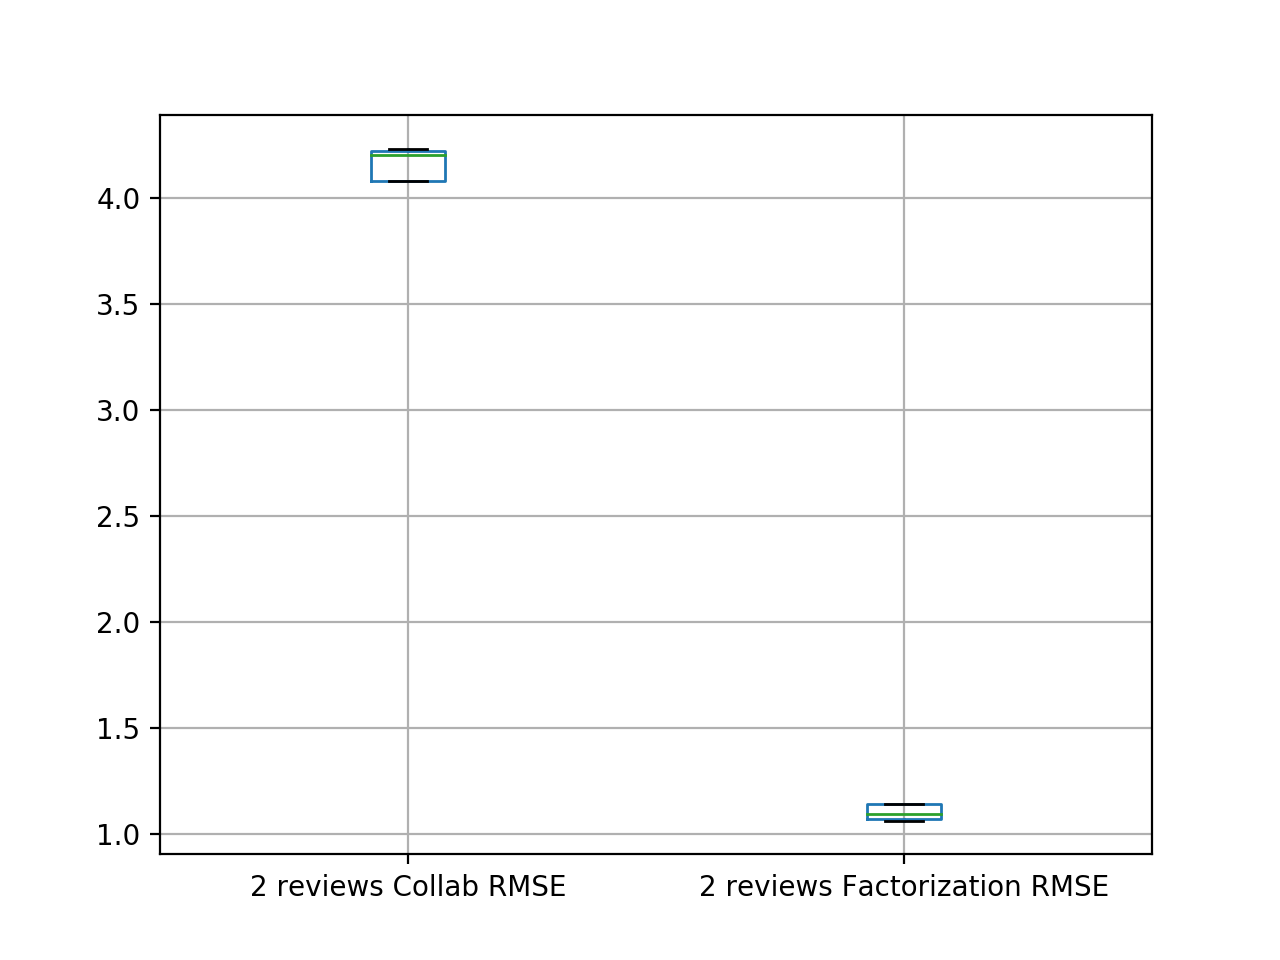

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 00:11:09.839636. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [185]:
%matplotlib notebook
df_rmse2.boxplot(column=['2 reviews Collab RMSE','2 reviews Factorization RMSE'])
plt.show()

<IPython.core.display.Javascript object>


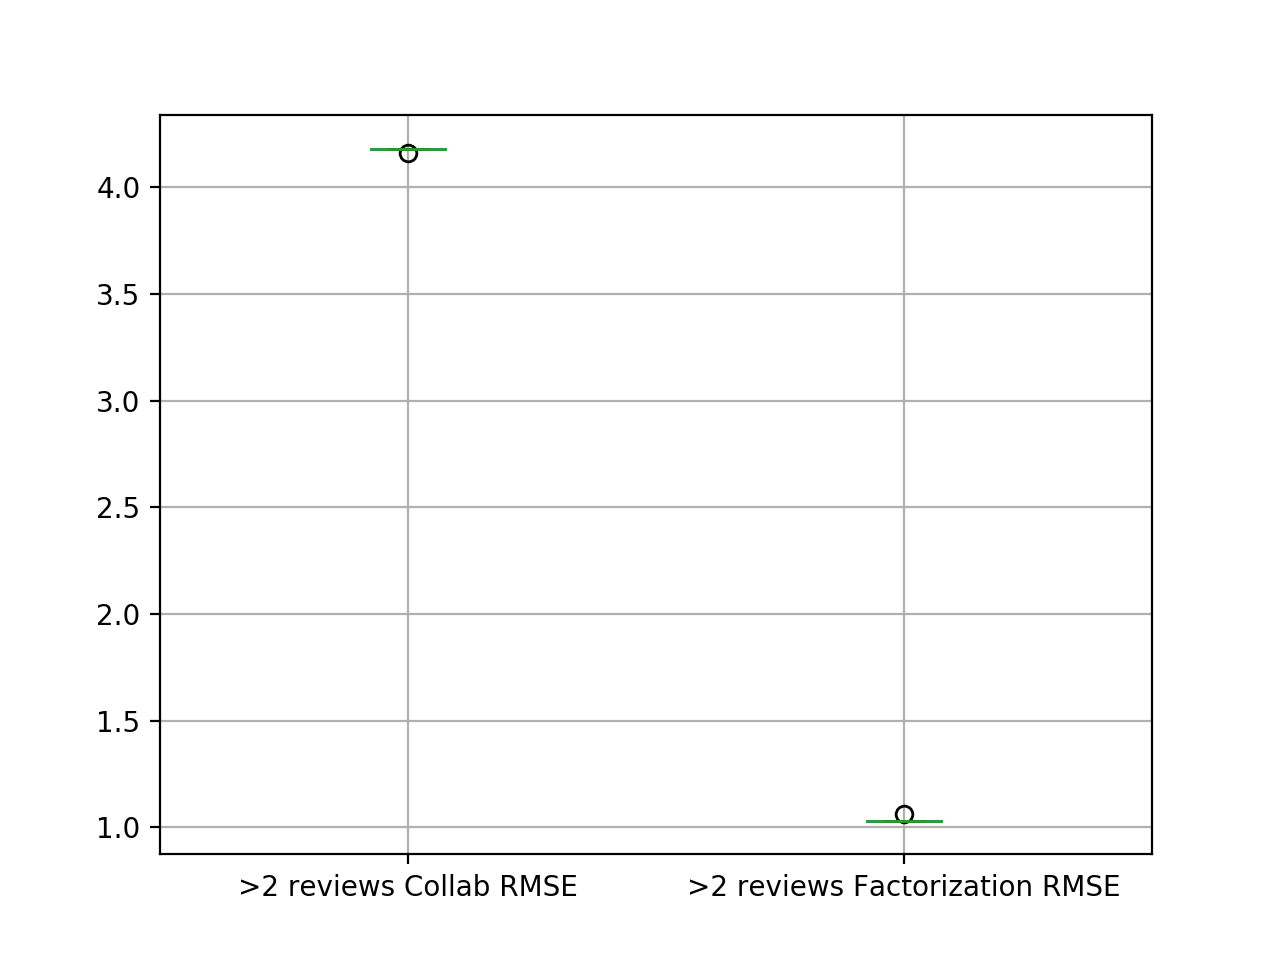

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 00:11:20.971284. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [186]:
%matplotlib notebook
df_rmse3plus.boxplot(column=['>2 reviews Collab RMSE','>2 reviews Factorization RMSE'])
plt.show()

In [187]:
df_rmse2.describe([.01, .05, .25, .5, .75, .95, .99])

,2 reviews Collab RMSE,2 reviews Factorization RMSE
count,5.000000,5.000000
mean,4.162000,1.100000
std,0.075631,0.038079
min,4.080000,1.060000
1%,4.080000,1.060400
5%,4.080000,1.062000
25%,4.080000,1.070000
50%,4.200000,1.090000
75%,4.220000,1.140000
95%,4.228000,1.140000


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 00:12:26.904355. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [188]:
df_rmse3plus.describe([.01, .05, .25, .5, .75, .95, .99])

,>2 reviews Collab RMSE,>2 reviews Factorization RMSE
count,5.000000,5.000000
mean,4.176000,1.036000
std,0.008944,0.013416
min,4.160000,1.030000
1%,4.160800,1.030000
5%,4.164000,1.030000
25%,4.180000,1.030000
50%,4.180000,1.030000
75%,4.180000,1.030000
95%,4.180000,1.054000


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 00:12:35.948595. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


It appears that the two filtered data sets show very similar means and confidence intervals to the original data set with all of the data. In order to verify this hypothesis that the means are equal, we will do an ANOVA to verify the results statistically. 

In [193]:
rmse_og_collab, rmse_og_fact = zip(*rmse)
rmse_2_collab, rmse_2_fact = zip(*rmse2)
rmse_3plus_collab, rmse_3plus_fact = zip(*rmse3plus)


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 12:33:54.741028. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [195]:
from scipy import stats

stats.f_oneway(rmse_og_collab, rmse_2_collab, rmse_3plus_collab)

F_onewayResult(statistic=2.912798476739404, pvalue=0.08170104370139761)

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 12:35:02.552280. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


As the p value for the ANOVA is greater than 0.05, we fail to reject the null hypothesis that the means are equal. This means that there was no statistically significant improvement between using the original data set, the data set with only 2 reviews per reviewer, and the data set with 3 plus reviews per reviewer.

With that done, we move onto the final section on ethics. The question here is: how much identifying information can we obtain on a user from the tripadvisor data set? We will approach this by identifying users with a large number of reviews and usernames that contain identifying data (such as "AZGUY99" where it has Arizona and 99 and gender: male in it) and see what we can come up with. 

In [203]:
pd.set_option('display.max_colwidth', -1)
df_user1 = df_3plus[df_3plus['Author'] == 'Pawel_EPWR']
print(df_user1)


                 Author AuthorLocation  BusServ  CheckIn  Cleanliness  \
UR122227398  Pawel_EPWR  Wroclaw        4.0      4.0      4.0           
UR122229403  Pawel_EPWR  Wroclaw        4.0      4.0      4.0           
UR122958793  Pawel_EPWR  Wroclaw        4.0      4.0      5.0           
UR123148637  Pawel_EPWR  Wroclaw        4.0      4.0      4.0           
UR123148637  Pawel_EPWR  Wroclaw        4.0      4.0      4.0           
UR123218897  Pawel_EPWR  Wroclaw        4.0      4.0      4.0           
UR123649891  Pawel_EPWR  Wroclaw        4.0      4.0      4.0           
UR124649897  Pawel_EPWR  Wroclaw        4.0      4.0      4.0           
UR124650002  Pawel_EPWR  Wroclaw        4.0      4.0      4.0           

                                            Hotel  HotelID HotelLocation  \
UR122227398  Ramada Hotel Berlin-Alexanderplatz    1857196  0              
UR122229403  H10 Berlin Ku'damm                    1987603  0              
UR122958793  Hotel JL No76               

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 13:11:32.573598. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [204]:
df_user2 = df_3plus[df_3plus['Author'] == 'scottca075']
print(df_user2)


                Author AuthorLocation  BusServ  CheckIn  Cleanliness  \
UR10386955  scottca075  CA             5.0      5.0      5.0           
UR20929564  scottca075  CA             4.0      5.0      5.0           
UR20930472  scottca075  CA             3.0      4.0      4.0           
UR36188501  scottca075  CA             4.0      4.0      4.0           
UR89940658  scottca075  CA             5.0      5.0      5.0           
UR89941096  scottca075  CA             5.0      5.0      5.0           

                                               Hotel  HotelID HotelLocation  \
UR10386955  The US Grant                              2515639  CA             
UR20929564  Disney's Port Orleans Resort - Riverside  2515887  FL             
UR20930472  Sheraton Gateway Los Angeles              78046    CA             
UR36188501  Encore At Wynn Las Vegas                  2515559  NV             
UR89940658  Hilton Checkers Hotel - Los Angeles       2516080  CA             
UR89941096  The Los A

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 13:21:51.390643. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [223]:
df_user3 = df_3plus[df_3plus['Author'] == 'Stevied888']
print(df_user3)


                 Author AuthorLocation  BusServ  CheckIn  Cleanliness  \
UR23757896   Stevied888  Florida        5.0      5.0      5.0           
UR23757896   Stevied888  Florida        5.0      5.0      5.0           
UR25958520   Stevied888  Florida        3.0      3.0      4.0           
UR35622373   Stevied888  Florida        4.0      4.0      5.0           
UR430169451  Stevied888  0              4.0      4.0      5.0           

                                                            Hotel  HotelID  \
UR23757896   Hilton Grand Vacations Suites on International Drive  2515931   
UR23757896   Hilton Grand Vacations Suites on International Drive  480622    
UR25958520   Sheraton Gateway Los Angeles                          78046     
UR35622373   Sheraton Suites Market Center                         98719     
UR430169451                                                        242435    

            HotelLocation  Location  Overall  PriceMax  PriceMin  \
UR23757896   FL         

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-12-09 15:15:06.220179. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)
